# Employee Attrition

**Problem Statement:**

Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.

Source: https://www.kaggle.com/patelprashant/employee-attrition

Acknowledgements: https://www.ibm.com/communities/analytics/watson-analytics-blog/watson-analytics-use-case-for-hr-retaining-valuable-employees/

## Columns description


Column Position | Attribute Name | Definition 
 --- | --- | --- 
 1 | Age | Employee age
2 | Attrition | Attrition:  0 'No' 1  'Yes' 
3 | BusinessTravel | Business Travel: 0 'Non-Travel'  1 'Travel Rarely'  2 'Travel Frequently'
4 | Department | Department: HR, R&D, Sales
5 | DailyRate | Daily rate compensation
6 | DistanceFromHome | Distance From Home
7 | Education | Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'
8 | EducationField | Education field: Life Science, Marketing, Medical, HR, Other, Tech Degree
9 | EmployeeCount | Employee count - used for record count
10 | EmployeeNumber | Employee Number
11 | EnvironmentSatisfaction | Employee Satisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
12 | Gender | Gender: 0 'Male' 1 'Female'
13 | HourlyRate | Hourly Rate compensation
14 | JobInvolvement | Job Involvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
15 | JobLevel | Job Level: Represents management level, 1 'No management responsibilities, 4 'Manager'
16 | JobRole | Job Role
17 | JobSatisfaction | Job Satisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
18 | MaritalStatus | Marital Status: '0' Single, 1 'Married', 2 'Divorced
19 | MonthlyIncome | Monthly Income
20 | MonthlyRate | Monthly Rate
21 | NumCompaniesWorked | Number of Companies Worked
22 | Over18 | Over 18: 0 'No' 1  'Yes' 
23 | OverTime | Over Time: 0 'No' 1  'Yes' 
24 | PercentSalaryHike | Percent Salary Hike
25 | PerformanceRating | Performance Rating: 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'
26 | RelationshipSatisfaction | Relationship Satisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
27 | StandardHours | Standard Hours
28 | StockOptionLevel | Stock Option Level
29 | TotalWorkingYears | Total Working Years
30 | TrainingTimesLastYear | Training Times Last Year
31 | WorkLifeBalance | Work Life Balance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'
32 | YearsAtCompany | Years At Company
33 | YearsInCurrentRole | Years In Current Role
34 | YearsSinceLastPromotion | Years Since Last Promotion
35 | YearsWithCurrManager | Years With Current Manager


## Project Plan

Make a hypothesis about a correlation in a dataset and test the hypothesis using a statistical inference technique (such as the t-test).

Build a predictive model using one of the techniques covered in the course, i.e., ordinary least squares regression or Naïve Bayes.

1. Explore and clean data
2. Hypothesis Generation & Testing
   - Gender analysis
   - Marital Status analysis  
3. Exploratory data analysis
   - Categorical analysis
   - Numerical analysis
4. Data Preparation 
   - Encode data
   - Split data
5. Classification Models Building
   - GaussianNB
   - Logistic regression
6. Model analysis and improvement
   - P-Val and correlation analysis
   - RandomForestClassifier
   - GridSearchCV
7. Features analysis and engineering
8. Outliers analysis
9. Feature reduction - income satisfaction
10. Clustering & PCA
   - Elbow analysis
   - Silhouette analysis 
11. MCMC model and analysis

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import calendar
import pingouin as pg

import scipy.stats as stats

import warnings
warnings.filterwarnings(action="ignore")


# Load data

In [2]:
df = pd.read_csv('employee-attrition.csv')
df.head(5).T

,0,1,2,3,4
Age,41,49,37,33,27
Attrition,Yes,No,Yes,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1102,279,1373,1392,591
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development
DistanceFromHome,1,8,2,3,2
Education,2,1,2,4,1
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical
EmployeeCount,1,1,1,1,1
EmployeeNumber,1,2,4,5,7


# Explore Data

In [3]:
def DataFrameInfo(df):
    print('Shape:',df.shape)
    print('-------------COLUMNS INFO---------------')
    print(df.info())
    print('-------------COLUMNS---------------')
    print(df.columns)
    print('-------------INDEX---------------')
    print(df.index)
    print('-------------AXIS---------------')
    print(df.axes)
    print('-------------DUPLICATES---------------')
    print('Duplicates:',df.duplicated().any())
    print('-------------MISSING DATA---------------')    
    print(df.isnull().sum().sort_values(ascending=False))
    print('-------------TOTAL MISSING DATA---------------')  
    print('Total number of missing values : ', df.isna().values.sum())
    print('-------------UNIQUE DATA---------------')
    print(df.apply(lambda x : len(x.unique())))

DataFrameInfo(df)

Shape: (1470, 35)
-------------COLUMNS INFO---------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement     

In [4]:
desc = df.describe()
desc.loc['Kurt'] = df.kurtosis()
desc.loc['Skew'] = df.skew()
desc.T

,count,mean,std,min,25%,50%,75%,max,Kurt,Skew
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0,-0.404145,0.413286
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0,-1.203823,-0.003519
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0,-0.224833,0.958118
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0,-0.559115,-0.289681
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0,0.000000,0.000000
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0,-1.223179,0.016574
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0,-1.202521,-0.321654
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0,-1.196398,-0.032311
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0,0.270999,-0.498419
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0,0.399152,1.025401


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


---------------------------------------------------------------------------
Highest correlation


MonthlyIncome            JobLevel                   0.950300
TotalWorkingYears        JobLevel                   0.782208
PerformanceRating        PercentSalaryHike          0.773550
TotalWorkingYears        MonthlyIncome              0.772893
YearsWithCurrManager     YearsAtCompany             0.769212
YearsInCurrentRole       YearsAtCompany             0.758754
YearsWithCurrManager     YearsInCurrentRole         0.714365
TotalWorkingYears        Age                        0.680381
YearsAtCompany           TotalWorkingYears          0.628133
YearsSinceLastPromotion  YearsAtCompany             0.618409
                         YearsInCurrentRole         0.548056
YearsAtCompany           JobLevel                   0.534739
                         MonthlyIncome              0.514285
YearsWithCurrManager     YearsSinceLastPromotion    0.510224
JobLevel                 Age                        0.509604
dtype: float64

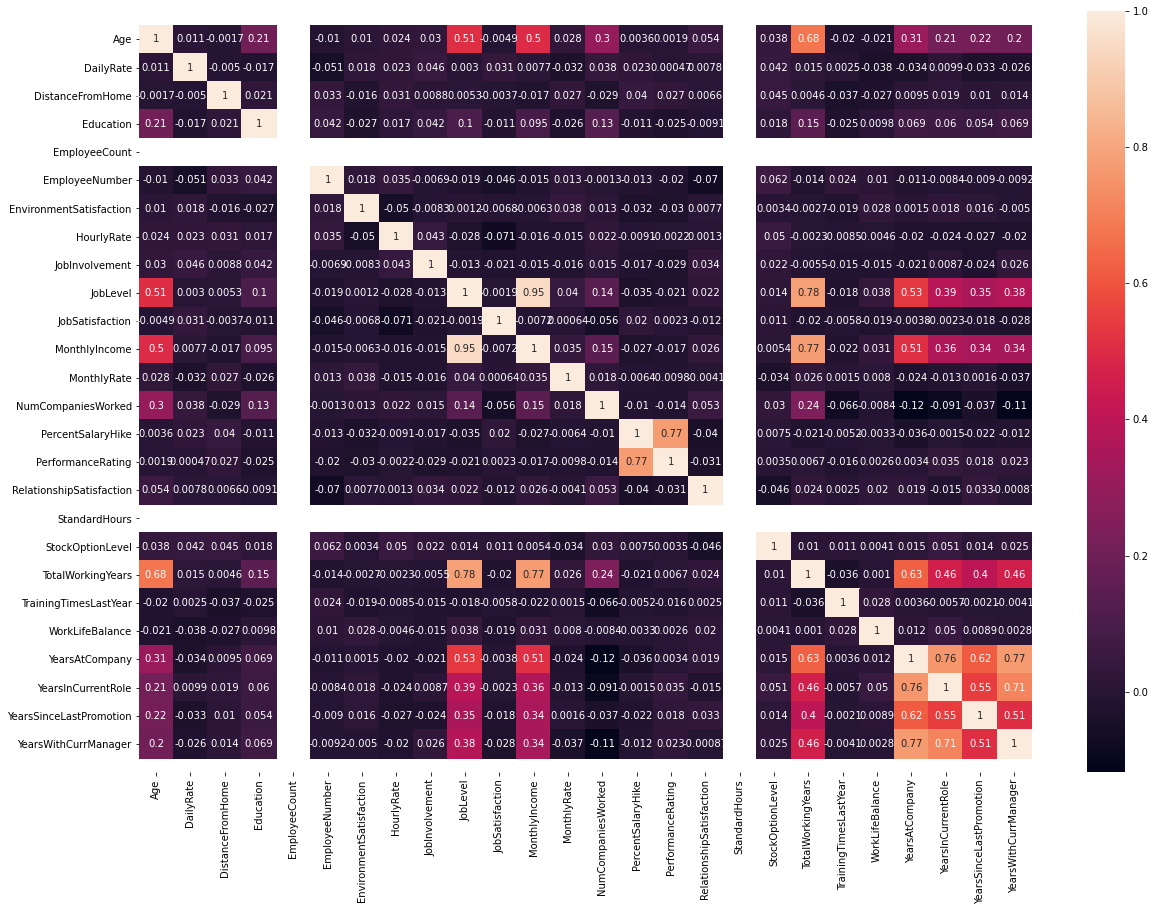

In [5]:
def ExploreCorrelation(df, significance, corr_map=False, cor_table=False):
    corr = df.corr()
    
    #Display correlation table
    if(cor_table): 
        display(corr)
    
    #Correlation heatmap
    if(corr_map):
        plt.figure(figsize=(20,14))
        ax = sns.heatmap(corr, annot=True) #notation: "annot" not "annote"
        bottom, top = ax.get_ylim()
        ax.set_ylim(bottom + 0.5, top - 0.5)
    
    print('-'*75)
    print('Highest correlation')
    
    
    #Filter significant correlation in upper triangle of the table 
    
    # remove values below index with NAN and then replace NAN with 0
    corr_upper = corr.where(np.triu(np.ones(corr.shape)).astype(np.bool))
    corr_upper = corr_upper.fillna(0)
    
    #unstack and sort dataframe
    corr_unstack = corr_upper.unstack()
    corr_sorted = corr_unstack.sort_values(kind="quicksort", ascending=False)
    #filter correlation by signifiance       
    corr_result = corr_sorted[((corr_sorted.values <1) & (corr_sorted.values >significance)) | (corr_sorted.values <-significance)]
    
    #Display all results
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(corr_result)
    
ExploreCorrelation(df,0.5, True, True)

In [6]:
#covert numberical to object and count, extended df.describe(include='O')
#useful when categories are already encoded i.e. M/F as 0 and 1
def CategoricalDescribe(df):   
    
    #optional filter only category of interestet 
    #cat_describe = df[['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Marital_Status', 'Product_Category_1']] #.astype('object').describe()
    #cat_describe = cat_describe.astype('object').describe()
    
    #or convert all 
    cat_describe = df.astype('object').describe()
    cat_describe.loc['percent'] = 100*cat_describe.loc['freq'] / cat_describe.loc['count']
    display(cat_describe.T)
    
CategoricalDescribe(df)

,count,unique,top,freq,percent
Age,1470,43,35,78,5.30612
Attrition,1470,2,No,1233,83.8776
BusinessTravel,1470,3,Travel_Rarely,1043,70.9524
DailyRate,1470,886,691,6,0.408163
Department,1470,3,Research & Development,961,65.3741
DistanceFromHome,1470,29,2,211,14.3537
Education,1470,5,3,572,38.9116
EducationField,1470,6,Life Sciences,606,41.2245
EmployeeCount,1470,1,1,1470,100
EmployeeNumber,1470,1470,2046,1,0.0680272


# Data Cleaning

In [7]:
# remove the following columns 
#- EmployeeCount,EmployeeNumber - are not usefull for analysis of attrition 
#- rendundant information:  MonthlyRate, HourlyRate, DailyRate, i will keep MonthlyIncome only
# 'StandardHours', and 'Over18' - are not very usefull either

In [8]:
df = df.drop(columns=['EmployeeCount','EmployeeNumber','MonthlyRate', 'HourlyRate', 'DailyRate','StandardHours','Over18'])

In [9]:
#Bin by age We will create the following bins:

bins = [0,10,20,30,40,60,90]
bin_labels = ['0-9','10-19','20-29', '30-39', '40-59', '>60']

# We will create a new attribute `age_group`:
df['age_group'] = pd.cut(df.Age, bins, right=False, labels = bin_labels)

In [10]:
#satisfaction - average rating of 4 parameters
df['Satisfaction'] = round((df['EnvironmentSatisfaction'] + df['JobInvolvement'] 
                            + df['JobSatisfaction'] + df['RelationshipSatisfaction'])/4)

In [11]:
numeric = ['Age', 'DistanceFromHome',
       'MonthlyIncome', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [12]:
categorical = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
               'JobRole', 'MaritalStatus', 'OverTime','Education','EnvironmentSatisfaction','JobInvolvement', 
              'JobLevel', 'JobSatisfaction','NumCompaniesWorked',
             'PerformanceRating', 'RelationshipSatisfaction','WorkLifeBalance','StockOptionLevel','age_group','Satisfaction']

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,41,49,37,33,27,32,59,30,38,36,...,29,50,39,31,26,36,39,27,49,34
Attrition,Yes,No,Yes,No,No,No,No,No,No,No,...,No,Yes,No,No,No,No,No,No,No,No
BusinessTravel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,...,Travel_Rarely,Travel_Rarely,Travel_Rarely,Non-Travel,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
Department,Sales,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,Research & Development,...,Research & Development,Sales,Sales,Research & Development,Sales,Research & Development,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,8,2,3,2,2,3,24,23,27,...,28,28,24,5,5,23,6,4,2,8
Education,2,1,2,4,1,2,3,1,3,3,...,4,3,1,3,3,2,1,3,3,3
EducationField,Life Sciences,Life Sciences,Other,Life Sciences,Medical,Life Sciences,Medical,Life Sciences,Life Sciences,Medical,...,Medical,Marketing,Marketing,Medical,Other,Medical,Medical,Life Sciences,Medical,Medical
EnvironmentSatisfaction,2,3,4,4,1,4,3,4,4,3,...,4,4,2,2,4,3,4,2,4,2
Gender,Female,Male,Male,Female,Male,Male,Female,Male,Male,Male,...,Female,Male,Female,Male,Female,Male,Male,Male,Male,Male
JobInvolvement,3,2,2,3,3,3,4,3,2,3,...,2,2,2,3,2,4,2,4,2,4


# Hypothesis generation and testing

### Mean of population

In [14]:
df_stat = df[numeric].describe().T
df_stat

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.0,29.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.0,14.0,18.0,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1470.0,2.799320,1.289271,0.0,2.0,3.0,3.0,6.0
YearsAtCompany,1470.0,7.008163,6.126525,0.0,3.0,5.0,9.0,40.0
YearsInCurrentRole,1470.0,4.229252,3.623137,0.0,2.0,3.0,7.0,18.0
YearsSinceLastPromotion,1470.0,2.187755,3.222430,0.0,0.0,1.0,3.0,15.0
YearsWithCurrManager,1470.0,4.123129,3.568136,0.0,2.0,3.0,7.0,17.0


In [15]:
df_stat_yes = df[df["Attrition"] == 'Yes'][numeric].mean().T
df_stat_yes

Age                          33.607595
DistanceFromHome             10.632911
MonthlyIncome              4787.092827
PercentSalaryHike            15.097046
TotalWorkingYears             8.244726
TrainingTimesLastYear         2.624473
YearsAtCompany                5.130802
YearsInCurrentRole            2.902954
YearsSinceLastPromotion       1.945148
YearsWithCurrManager          2.852321
dtype: float64

In [16]:
df_stat_no = df[df["Attrition"] == 'No'][numeric].mean().T
df_stat_no

Age                          37.561233
DistanceFromHome              8.915653
MonthlyIncome              6832.739659
PercentSalaryHike            15.231144
TotalWorkingYears            11.862936
TrainingTimesLastYear         2.832928
YearsAtCompany                7.369019
YearsInCurrentRole            4.484185
YearsSinceLastPromotion       2.234388
YearsWithCurrManager          4.367397
dtype: float64

In [17]:
def TTest(sample, h_0):
    
    ttest=stats.ttest_1samp(sample,h_0)
    #print(ttest)
    
    if(ttest.pvalue>0.05):
        print("The t test statistic is",round(float(ttest.statistic),4)
        ,"and the p-value is",round(float(ttest.pvalue),4)
        ,"which means that the probability of obtaining a value of"
        ,str(round(sample.mean(),1)),"just by chance (or randomly) is"
        ,str(round(float(ttest.pvalue)*100,2))
        ,"% assuming that the null hypothesis (the average is"
         ,h_0,") is true.")
    else:
        print("The t test statistic is",round(float(ttest.statistic),4)
        ,"and the p-value is",round(float(ttest.pvalue),4)
        ,"which means that the probability of obtaining a value of"
        ,str(round(sample.mean(),1)),"just by chance (or randomly) is"
        ,str(round(float(ttest.pvalue)*100,2))
        ,"% assuming that the null hypothesis (the average is"
         ,h_0,") is false.")

In [18]:
### Hypothises H_0: [attrition = yes].mean  = population.mean  

In [19]:
for col,h_0 in zip(df_stat.index,df_stat_yes):
    print(col,':')
    TTest(df[col], h_0)
    print('-'*100)

Age :
The t test statistic is 13.9179 and the p-value is 0.0 which means that the probability of obtaining a value of 36.9 just by chance (or randomly) is 0.0 % assuming that the null hypothesis (the average is 33.607594936708864 ) is false.
----------------------------------------------------------------------------------------------------
DistanceFromHome :
The t test statistic is -6.8122 and the p-value is 0.0 which means that the probability of obtaining a value of 9.2 just by chance (or randomly) is 0.0 % assuming that the null hypothesis (the average is 10.632911392405063 ) is false.
----------------------------------------------------------------------------------------------------
MonthlyIncome :
The t test statistic is 13.9734 and the p-value is 0.0 which means that the probability of obtaining a value of 6502.9 just by chance (or randomly) is 0.0 % assuming that the null hypothesis (the average is 4787.0928270042195 ) is false.
------------------------------------------------

In [20]:
### Hypothises H_0: [attrition = no].mean  = population.mean  

In [21]:
for col,h_0 in zip(df_stat.index,df_stat_no):
    print(col,':')
    TTest(df[col], h_0)
    print('-'*100)

Age :
The t test statistic is -2.6752 and the p-value is 0.0076 which means that the probability of obtaining a value of 36.9 just by chance (or randomly) is 0.76 % assuming that the null hypothesis (the average is 37.561232765612324 ) is false.
----------------------------------------------------------------------------------------------------
DistanceFromHome :
The t test statistic is 1.3094 and the p-value is 0.1906 which means that the probability of obtaining a value of 9.2 just by chance (or randomly) is 19.06 % assuming that the null hypothesis (the average is 8.915652879156529 ) is true.
----------------------------------------------------------------------------------------------------
MonthlyIncome :
The t test statistic is -2.6859 and the p-value is 0.0073 which means that the probability of obtaining a value of 6502.9 just by chance (or randomly) is 0.73 % assuming that the null hypothesis (the average is 6832.739659367397 ) is false.
---------------------------------------

### Mean of data per gender

In [22]:
df_2test = df[numeric]
df_2test['Gender'] = df.loc[:,'Gender'].values
df_2test = df_2test.groupby('Gender').mean()
df_2test

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Gender,,,,,,,,,,
Female,37.329932,9.210884,6686.566327,15.197279,11.726190,2.860544,7.231293,4.413265,2.294218,4.256803
Male,36.653061,9.180272,6380.507937,15.217687,10.981859,2.758503,6.859410,4.106576,2.116780,4.034014


In [23]:
for col,h_0 in zip(df_stat.index,df_stat['mean']):
    female = df[df['Gender'] == 'Female'][col]
    male = df[df['Gender'] == 'Male'][col]
    print(col,':')
    print(stats.ttest_ind(female, male))    
    print('-'*100)

Age :
Ttest_indResult(statistic=1.3921381802920636, pvalue=0.16409141231818586)
----------------------------------------------------------------------------------------------------
DistanceFromHome :
Ttest_indResult(statistic=0.07090215413487343, pvalue=0.94348528639067)
----------------------------------------------------------------------------------------------------
MonthlyIncome :
Ttest_indResult(statistic=1.2212617308870655, pvalue=0.22218303455087904)
----------------------------------------------------------------------------------------------------
PercentSalaryHike :
Ttest_indResult(statistic=-0.10470038166645781, pvalue=0.9166278618500336)
----------------------------------------------------------------------------------------------------
TotalWorkingYears :
Ttest_indResult(statistic=1.7981963438693473, pvalue=0.07235128443770251)
----------------------------------------------------------------------------------------------------
TrainingTimesLastYear :
Ttest_indResult(stati

the null hypothesis that two independent samples have identical average (expected) values, 
or we can say if p-val < 0.05 that H_0 is a statistically significant difference between two groups


since p-val > 0.05 for all columns
therefore we fail to reject null hypothesis

### Mean data per Marital Status

In [24]:
df_2test_ms = df[numeric]
df_2test_ms['MaritalStatus'] = df.loc[:,'MaritalStatus'].values
df_2test_ms['MaritalStatus'] = df_2test_ms.apply(
    lambda row: row['MaritalStatus'] if row['MaritalStatus']=='Married' else 'Not Married',
    axis=1)
df_2test_ms = df_2test_ms.groupby('MaritalStatus').mean()
df_2test_ms

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MaritalStatus,,,,,,,,,,
Married,37.757801,9.459138,6793.671620,15.292719,11.732541,2.757801,7.307578,4.487370,2.377415,4.251114
Not Married,36.219573,8.967378,6257.425345,15.139272,10.897114,2.834379,6.755332,4.011292,2.027604,4.015056


In [25]:
for col,h_0 in zip(df_stat.index,df_stat['mean']):
    married = df[df['MaritalStatus'] == 'Married'][col]
    notmarried = df[df['MaritalStatus'] != 'Married'][col]
    print(col,':')
    print(stats.ttest_ind(married, notmarried))    
    print('-'*100)

Age :
Ttest_indResult(statistic=3.226703586338508, pvalue=0.0012798681911756569)
----------------------------------------------------------------------------------------------------
DistanceFromHome :
Ttest_indResult(statistic=1.1588559724796987, pvalue=0.2467033708474679)
----------------------------------------------------------------------------------------------------
MonthlyIncome :
Ttest_indResult(statistic=2.178526618434823, pvalue=0.029525486803258744)
----------------------------------------------------------------------------------------------------
PercentSalaryHike :
Ttest_indResult(statistic=0.8007729645413901, pvalue=0.42339267054712715)
----------------------------------------------------------------------------------------------------
TotalWorkingYears :
Ttest_indResult(statistic=2.0532317534523505, pvalue=0.04022697394532087)
----------------------------------------------------------------------------------------------------
TrainingTimesLastYear :
Ttest_indResult(stat

the null hypothesis that two independent samples have identical average (expected) values, 
or we can say if p-val < 0.05 that H_0 is a statistically significant difference between two groups


where p-val > 0.05 for all columns
therefore we fail to reject null hypothesis for the following groups
 - DistanceFromHome 
 - PercentSalaryHike 
 - TrainingTimesLastYear 
 - YearsAtCompany 
 - YearsWithCurrManager 

# Exploratory data analysis
    - Categorical analysis
    - Numerical analysis

In [26]:
def CatAnalysis(df,cat1,cat2):
    
   
    g =sns.FacetGrid(df, col=cat2, height=3.2, aspect=1.6)
    g.set_xticklabels(rotation=30)
    g.map(sns.countplot, cat1)
    
    
    
    ct = pd.crosstab(df[cat1], df[cat2], margins=True)
    ct['No%'] = round(ct.iloc[:,0]/ct.iloc[:,2],2)
    ct['Yes%'] = round(ct.iloc[:,1]/ct.iloc[:,2],2)
    
    sub_cat  = ct.iloc[:,-1].idxmax()
    percent = ct.iloc[:,-1].max()
    
    display(ct)
    ct = round(100*pd.crosstab(df[cat1], df[cat2], margins=True, normalize="all"),2)
       
    
    display(ct)
    return (cat1, sub_cat,percent)

Attrition,No,Yes,All,No%,Yes%
Attrition,,,,,
No,1233,0,1233,1.00,0.00
Yes,0,237,237,0.00,1.00
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
Attrition,,,
No,83.88,0.00,83.88
Yes,0.00,16.12,16.12
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
BusinessTravel,,,,,
Non-Travel,138,12,150,0.92,0.08
Travel_Frequently,208,69,277,0.75,0.25
Travel_Rarely,887,156,1043,0.85,0.15
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
BusinessTravel,,,
Non-Travel,9.39,0.82,10.20
Travel_Frequently,14.15,4.69,18.84
Travel_Rarely,60.34,10.61,70.95
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
Department,,,,,
Human Resources,51,12,63,0.81,0.19
Research & Development,828,133,961,0.86,0.14
Sales,354,92,446,0.79,0.21
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
Department,,,
Human Resources,3.47,0.82,4.29
Research & Development,56.33,9.05,65.37
Sales,24.08,6.26,30.34
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
EducationField,,,,,
Human Resources,20,7,27,0.74,0.26
Life Sciences,517,89,606,0.85,0.15
Marketing,124,35,159,0.78,0.22
Medical,401,63,464,0.86,0.14
Other,71,11,82,0.87,0.13
Technical Degree,100,32,132,0.76,0.24
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
EducationField,,,
Human Resources,1.36,0.48,1.84
Life Sciences,35.17,6.05,41.22
Marketing,8.44,2.38,10.82
Medical,27.28,4.29,31.56
Other,4.83,0.75,5.58
Technical Degree,6.80,2.18,8.98
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
Gender,,,,,
Female,501,87,588,0.85,0.15
Male,732,150,882,0.83,0.17
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
Gender,,,
Female,34.08,5.92,40.0
Male,49.80,10.20,60.0
All,83.88,16.12,100.0


Attrition,No,Yes,All,No%,Yes%
JobRole,,,,,
Healthcare Representative,122,9,131,0.93,0.07
Human Resources,40,12,52,0.77,0.23
Laboratory Technician,197,62,259,0.76,0.24
Manager,97,5,102,0.95,0.05
Manufacturing Director,135,10,145,0.93,0.07
Research Director,78,2,80,0.98,0.02
Research Scientist,245,47,292,0.84,0.16
Sales Executive,269,57,326,0.83,0.17
Sales Representative,50,33,83,0.60,0.40


Attrition,No,Yes,All
JobRole,,,
Healthcare Representative,8.30,0.61,8.91
Human Resources,2.72,0.82,3.54
Laboratory Technician,13.40,4.22,17.62
Manager,6.60,0.34,6.94
Manufacturing Director,9.18,0.68,9.86
Research Director,5.31,0.14,5.44
Research Scientist,16.67,3.20,19.86
Sales Executive,18.30,3.88,22.18
Sales Representative,3.40,2.24,5.65


Attrition,No,Yes,All,No%,Yes%
MaritalStatus,,,,,
Divorced,294,33,327,0.90,0.10
Married,589,84,673,0.88,0.12
Single,350,120,470,0.74,0.26
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
MaritalStatus,,,
Divorced,20.00,2.24,22.24
Married,40.07,5.71,45.78
Single,23.81,8.16,31.97
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
OverTime,,,,,
No,944,110,1054,0.90,0.10
Yes,289,127,416,0.69,0.31
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
OverTime,,,
No,64.22,7.48,71.7
Yes,19.66,8.64,28.3
All,83.88,16.12,100.0


Attrition,No,Yes,All,No%,Yes%
Education,,,,,
1,139,31,170,0.82,0.18
2,238,44,282,0.84,0.16
3,473,99,572,0.83,0.17
4,340,58,398,0.85,0.15
5,43,5,48,0.90,0.10
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
Education,,,
1,9.46,2.11,11.56
2,16.19,2.99,19.18
3,32.18,6.73,38.91
4,23.13,3.95,27.07
5,2.93,0.34,3.27
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
EnvironmentSatisfaction,,,,,
1,212,72,284,0.75,0.25
2,244,43,287,0.85,0.15
3,391,62,453,0.86,0.14
4,386,60,446,0.87,0.13
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
EnvironmentSatisfaction,,,
1,14.42,4.90,19.32
2,16.60,2.93,19.52
3,26.60,4.22,30.82
4,26.26,4.08,30.34
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
JobInvolvement,,,,,
1,55,28,83,0.66,0.34
2,304,71,375,0.81,0.19
3,743,125,868,0.86,0.14
4,131,13,144,0.91,0.09
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
JobInvolvement,,,
1,3.74,1.90,5.65
2,20.68,4.83,25.51
3,50.54,8.50,59.05
4,8.91,0.88,9.80
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
JobLevel,,,,,
1,400,143,543,0.74,0.26
2,482,52,534,0.90,0.10
3,186,32,218,0.85,0.15
4,101,5,106,0.95,0.05
5,64,5,69,0.93,0.07
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
JobLevel,,,
1,27.21,9.73,36.94
2,32.79,3.54,36.33
3,12.65,2.18,14.83
4,6.87,0.34,7.21
5,4.35,0.34,4.69
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
JobSatisfaction,,,,,
1,223,66,289,0.77,0.23
2,234,46,280,0.84,0.16
3,369,73,442,0.83,0.17
4,407,52,459,0.89,0.11
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
JobSatisfaction,,,
1,15.17,4.49,19.66
2,15.92,3.13,19.05
3,25.10,4.97,30.07
4,27.69,3.54,31.22
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
NumCompaniesWorked,,,,,
0,174,23,197,0.88,0.12
1,423,98,521,0.81,0.19
2,130,16,146,0.89,0.11
3,143,16,159,0.90,0.10
4,122,17,139,0.88,0.12
5,47,16,63,0.75,0.25
6,54,16,70,0.77,0.23
7,57,17,74,0.77,0.23
8,43,6,49,0.88,0.12


Attrition,No,Yes,All
NumCompaniesWorked,,,
0,11.84,1.56,13.40
1,28.78,6.67,35.44
2,8.84,1.09,9.93
3,9.73,1.09,10.82
4,8.30,1.16,9.46
5,3.20,1.09,4.29
6,3.67,1.09,4.76
7,3.88,1.16,5.03
8,2.93,0.41,3.33


Attrition,No,Yes,All,No%,Yes%
PerformanceRating,,,,,
3,1044,200,1244,0.84,0.16
4,189,37,226,0.84,0.16
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
PerformanceRating,,,
3,71.02,13.61,84.63
4,12.86,2.52,15.37
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
RelationshipSatisfaction,,,,,
1,219,57,276,0.79,0.21
2,258,45,303,0.85,0.15
3,388,71,459,0.85,0.15
4,368,64,432,0.85,0.15
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
RelationshipSatisfaction,,,
1,14.90,3.88,18.78
2,17.55,3.06,20.61
3,26.39,4.83,31.22
4,25.03,4.35,29.39
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
WorkLifeBalance,,,,,
1,55,25,80,0.69,0.31
2,286,58,344,0.83,0.17
3,766,127,893,0.86,0.14
4,126,27,153,0.82,0.18
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
WorkLifeBalance,,,
1,3.74,1.70,5.44
2,19.46,3.95,23.40
3,52.11,8.64,60.75
4,8.57,1.84,10.41
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
StockOptionLevel,,,,,
0,477,154,631,0.76,0.24
1,540,56,596,0.91,0.09
2,146,12,158,0.92,0.08
3,70,15,85,0.82,0.18
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
StockOptionLevel,,,
0,32.45,10.48,42.93
1,36.73,3.81,40.54
2,9.93,0.82,10.75
3,4.76,1.02,5.78
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
age_group,,,,,
10-19,7,10,17,0.41,0.59
20-29,228,81,309,0.74,0.26
30-39,533,89,622,0.86,0.14
40-59,460,57,517,0.89,0.11
>60,5,0,5,1.00,0.00
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
age_group,,,
10-19,0.48,0.68,1.16
20-29,15.51,5.51,21.02
30-39,36.26,6.05,42.31
40-59,31.29,3.88,35.17
>60,0.34,0.00,0.34
All,83.88,16.12,100.00


Attrition,No,Yes,All,No%,Yes%
Satisfaction,,,,,
1.0,4,5,9,0.44,0.56
2.0,478,133,611,0.78,0.22
3.0,619,83,702,0.88,0.12
4.0,132,16,148,0.89,0.11
All,1233,237,1470,0.84,0.16


Attrition,No,Yes,All
Satisfaction,,,
1.0,0.27,0.34,0.61
2.0,32.52,9.05,41.56
3.0,42.11,5.65,47.76
4.0,8.98,1.09,10.07
All,83.88,16.12,100.00


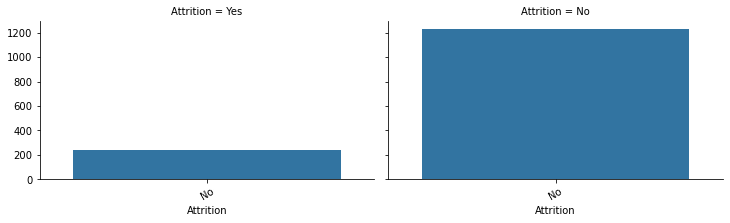

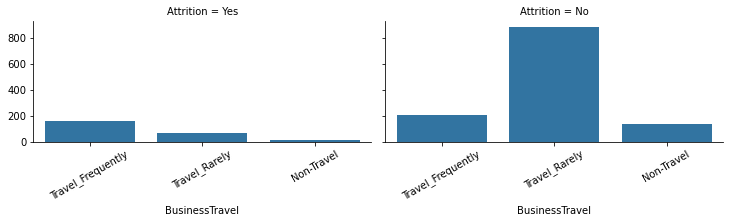

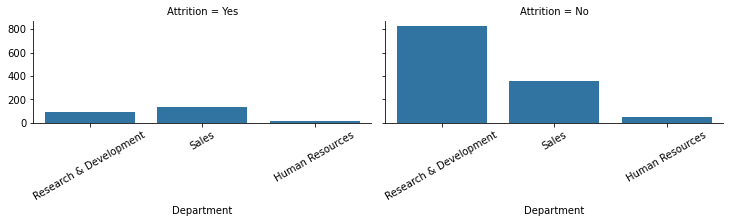

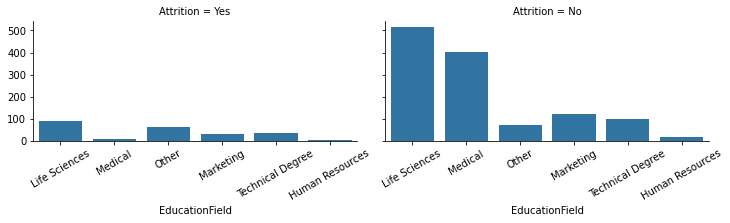

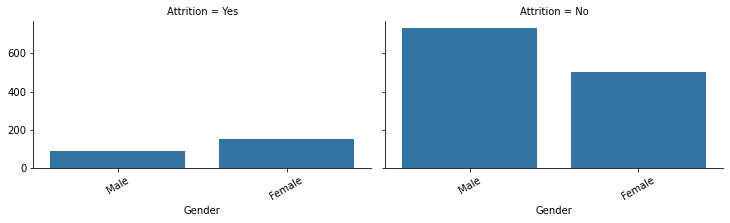

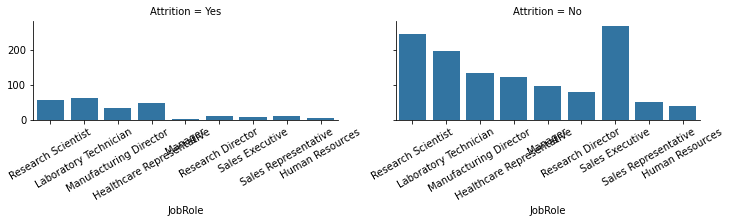

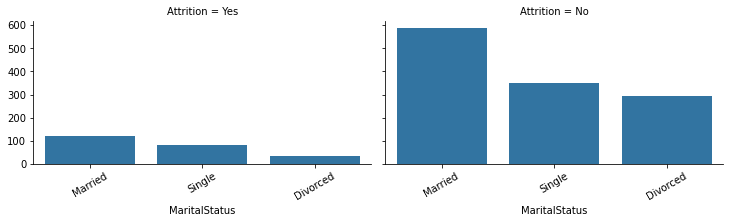

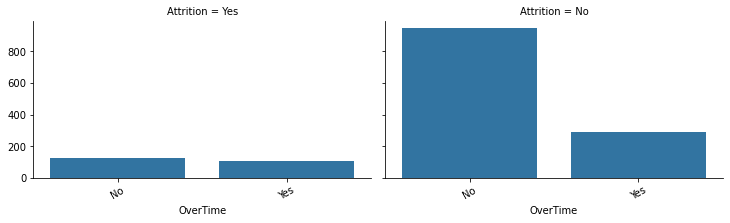

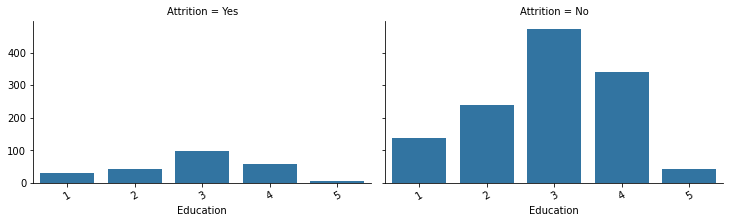

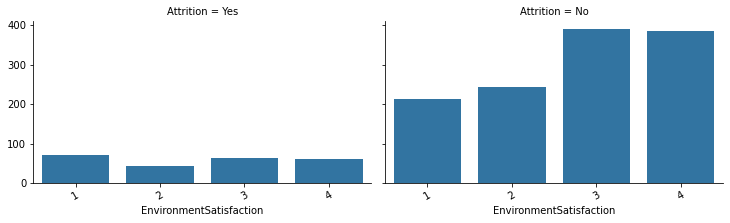

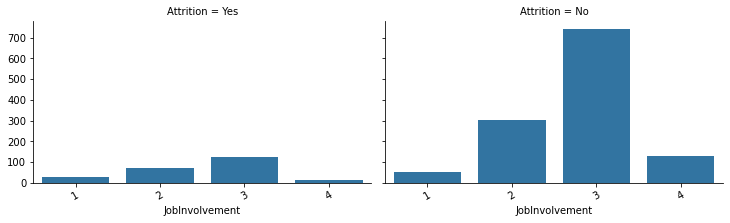

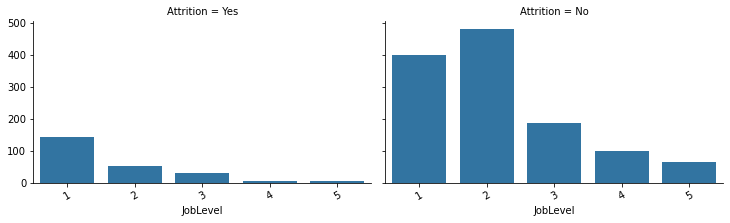

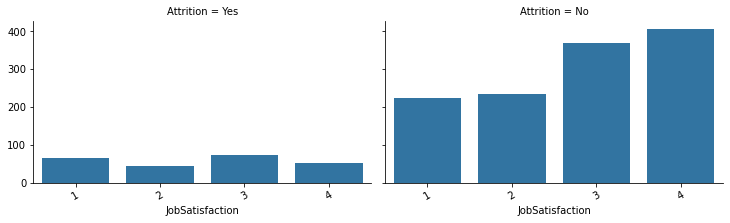

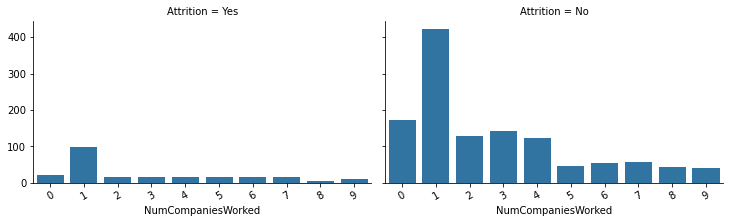

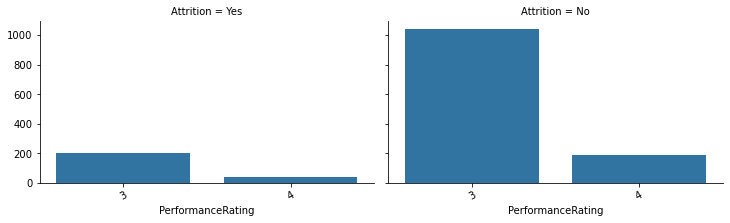

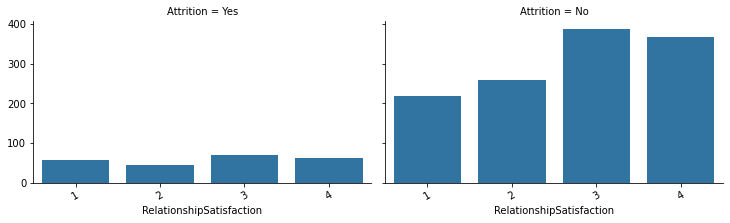

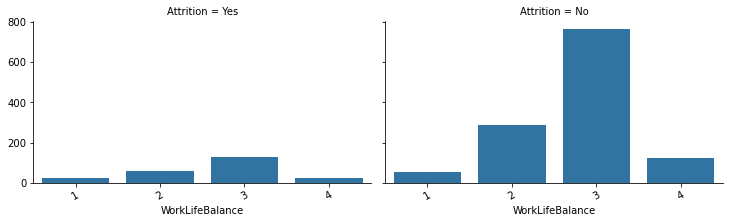

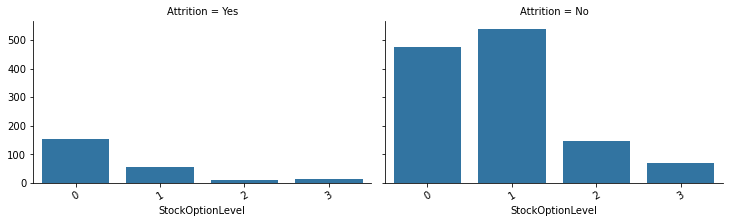

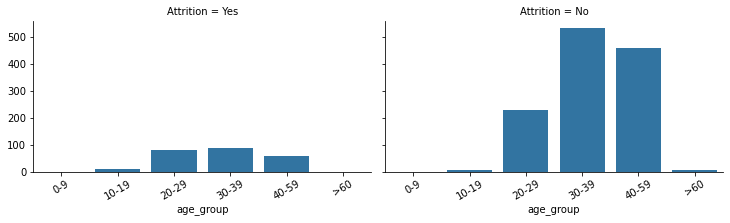

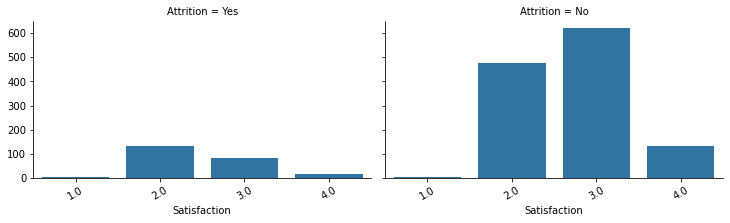

In [27]:
most_likely = []
for col in categorical:
    ml = CatAnalysis(df,col,'Attrition')
    most_likely.append(ml)

In [28]:
print('Most likely to quit their job:')
print("-"*50)
most_likely

Most likely to quit their job:
--------------------------------------------------


[('Attrition', 'Yes', 1.0),
 ('BusinessTravel', 'Travel_Frequently', 0.25),
 ('Department', 'Sales', 0.21),
 ('EducationField', 'Human Resources', 0.26),
 ('Gender', 'Male', 0.17),
 ('JobRole', 'Sales Representative', 0.4),
 ('MaritalStatus', 'Single', 0.26),
 ('OverTime', 'Yes', 0.31),
 ('Education', 1, 0.18),
 ('EnvironmentSatisfaction', 1, 0.25),
 ('JobInvolvement', 1, 0.34),
 ('JobLevel', 1, 0.26),
 ('JobSatisfaction', 1, 0.23),
 ('NumCompaniesWorked', 5, 0.25),
 ('PerformanceRating', 3, 0.16),
 ('RelationshipSatisfaction', 1, 0.21),
 ('WorkLifeBalance', 1, 0.31),
 ('StockOptionLevel', 0, 0.24),
 ('age_group', '10-19', 0.59),
 ('Satisfaction', 1.0, 0.56)]

In [29]:
df[df["Attrition"] == 'Yes'][numeric].mean().T

Age                          33.607595
DistanceFromHome             10.632911
MonthlyIncome              4787.092827
PercentSalaryHike            15.097046
TotalWorkingYears             8.244726
TrainingTimesLastYear         2.624473
YearsAtCompany                5.130802
YearsInCurrentRole            2.902954
YearsSinceLastPromotion       1.945148
YearsWithCurrManager          2.852321
dtype: float64

In [30]:
df[df["Attrition"] == 'No'][numeric].mean().T

Age                          37.561233
DistanceFromHome              8.915653
MonthlyIncome              6832.739659
PercentSalaryHike            15.231144
TotalWorkingYears            11.862936
TrainingTimesLastYear         2.832928
YearsAtCompany                7.369019
YearsInCurrentRole            4.484185
YearsSinceLastPromotion       2.234388
YearsWithCurrManager          4.367397
dtype: float64

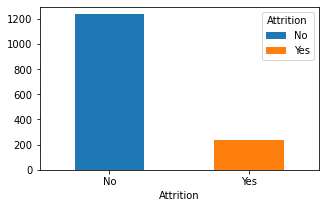

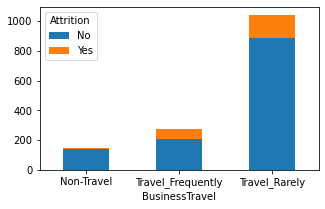

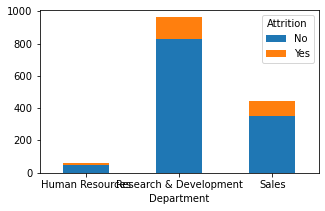

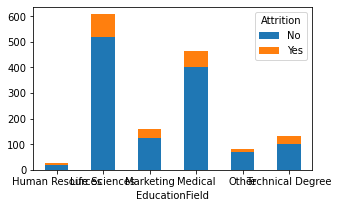

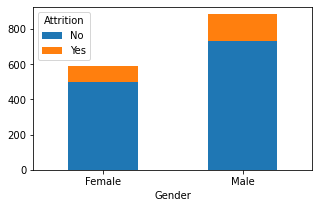

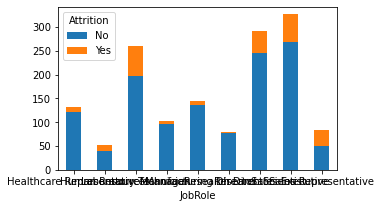

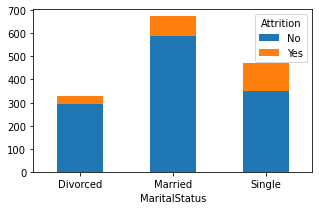

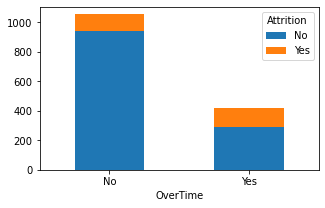

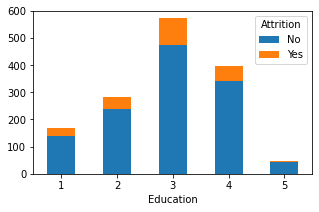

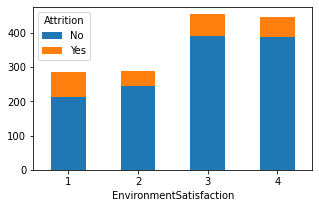

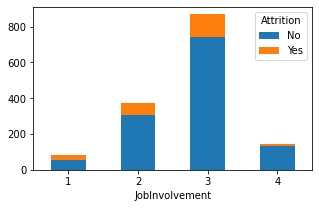

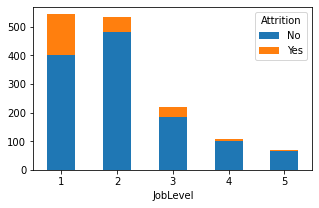

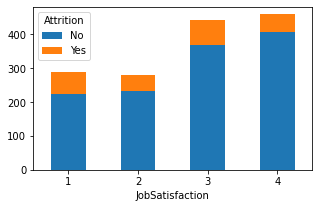

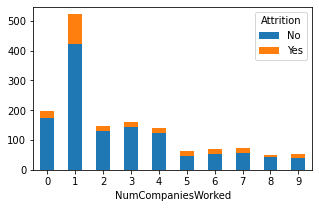

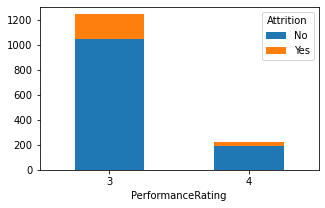

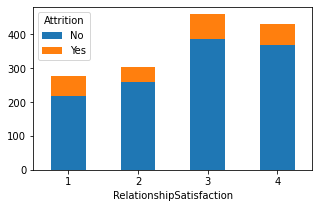

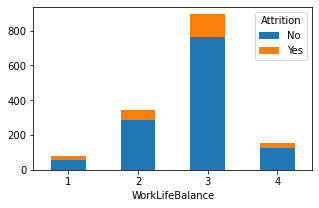

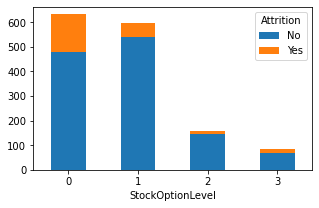

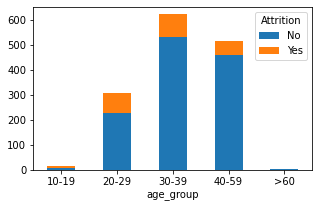

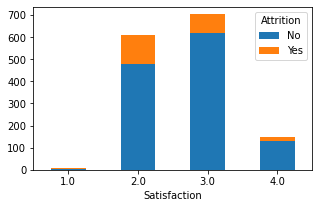

In [31]:
# Stacked bar plot
for col in categorical:  
    ct_df = pd.crosstab(df[col],df['Attrition'])
    ct_df.plot(kind='bar', stacked=True, rot = 0, figsize=(5, 3));

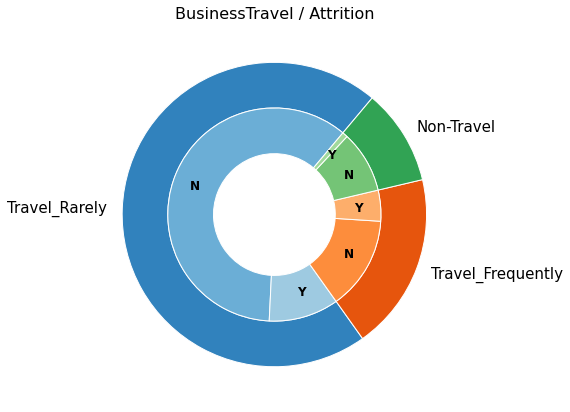

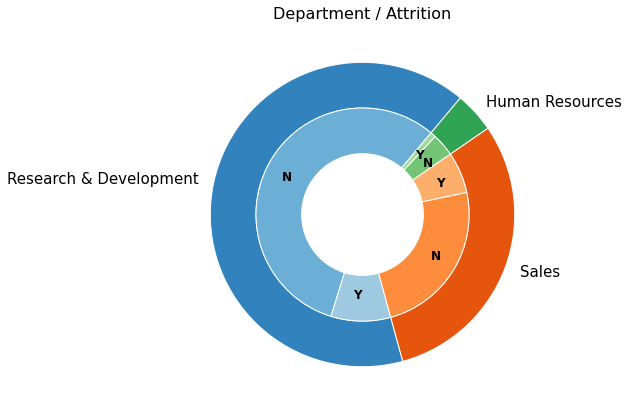

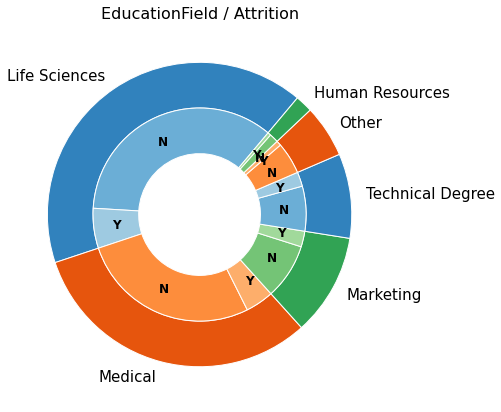

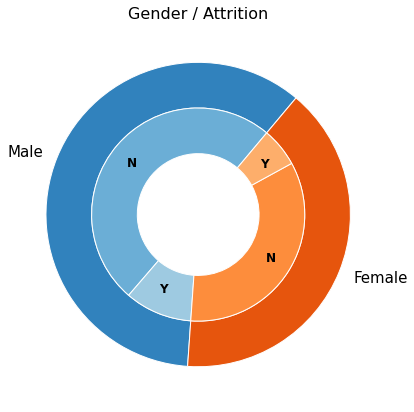

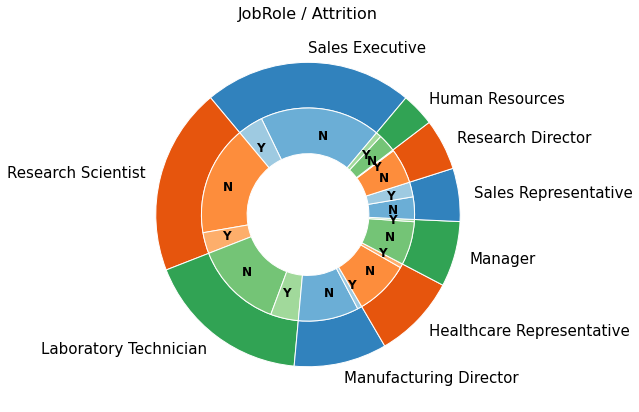

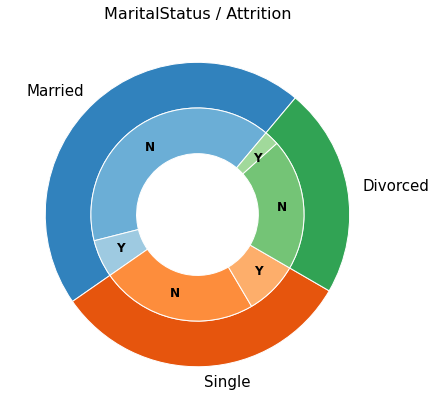

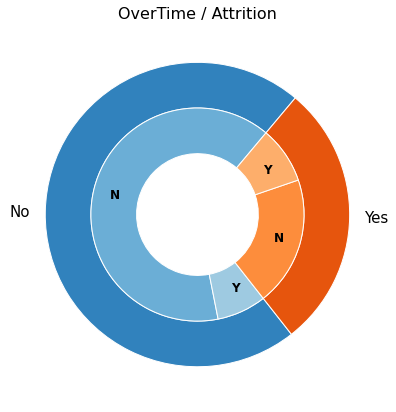

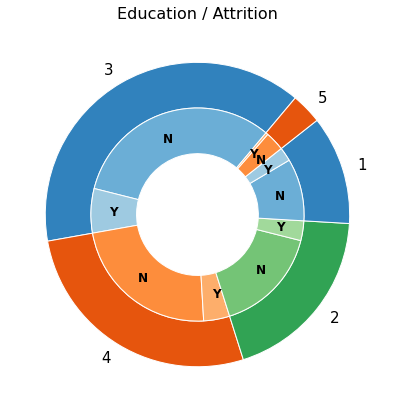

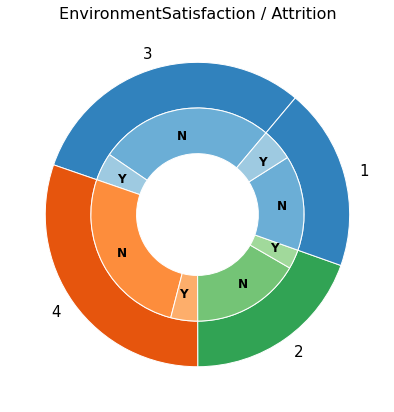

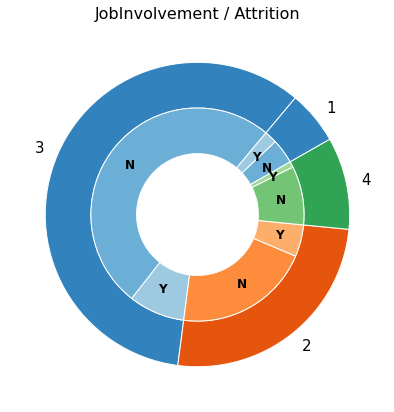

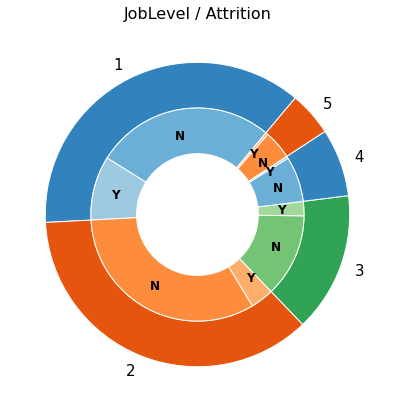

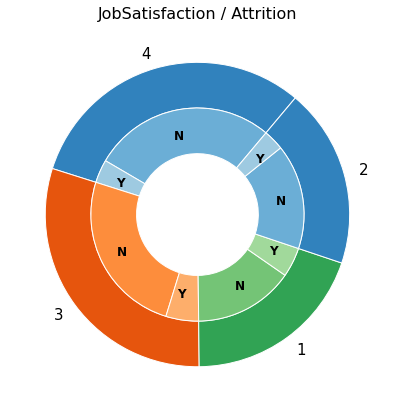

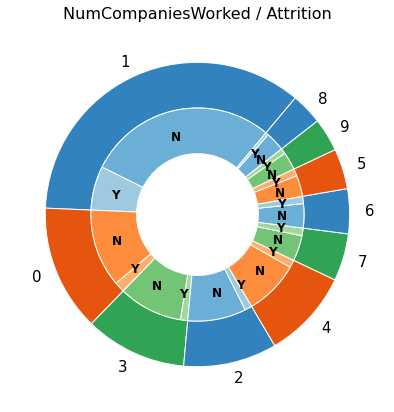

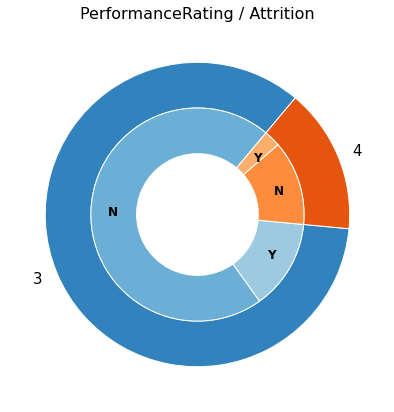

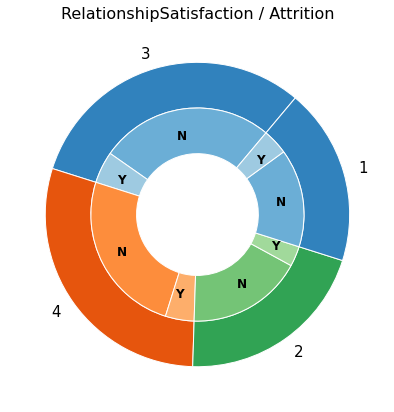

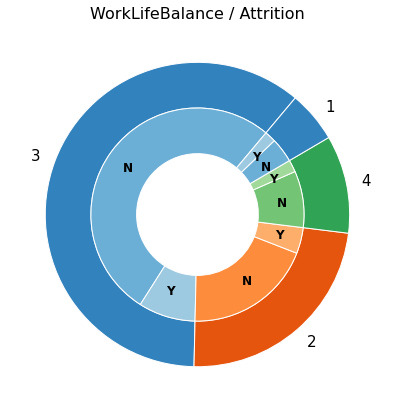

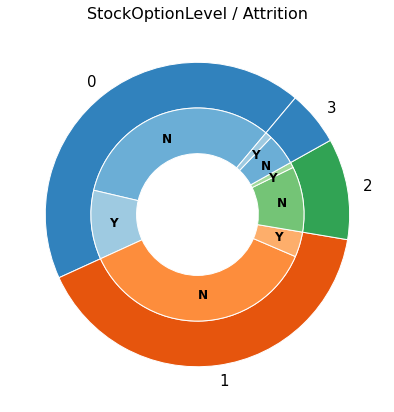

In [32]:
for col in categorical[1:-2]:  #start with 1 to exclude attrition column
    out_vals = df[col].value_counts()
    in_vals = np.array([df[df[col]==x]['Attrition'].value_counts() for x in out_vals.index]).flatten()

    fig, ax = plt.subplots(figsize=(7, 7))

    size = 0.3
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(3)*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))


    ax.pie(out_vals, radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'),labels=out_vals.index,
       textprops={'fontsize': 15}, startangle=50)

    ax.pie(in_vals, radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), labels=['N', 'Y']*len(out_vals),
       labeldistance=0.75, textprops={'fontsize': 12, 'weight': 'bold'}, startangle=50)

    ax.set(aspect="equal")
    title = col + ' / Attrition'
    plt.title(title, fontsize=16)
    plt.show()


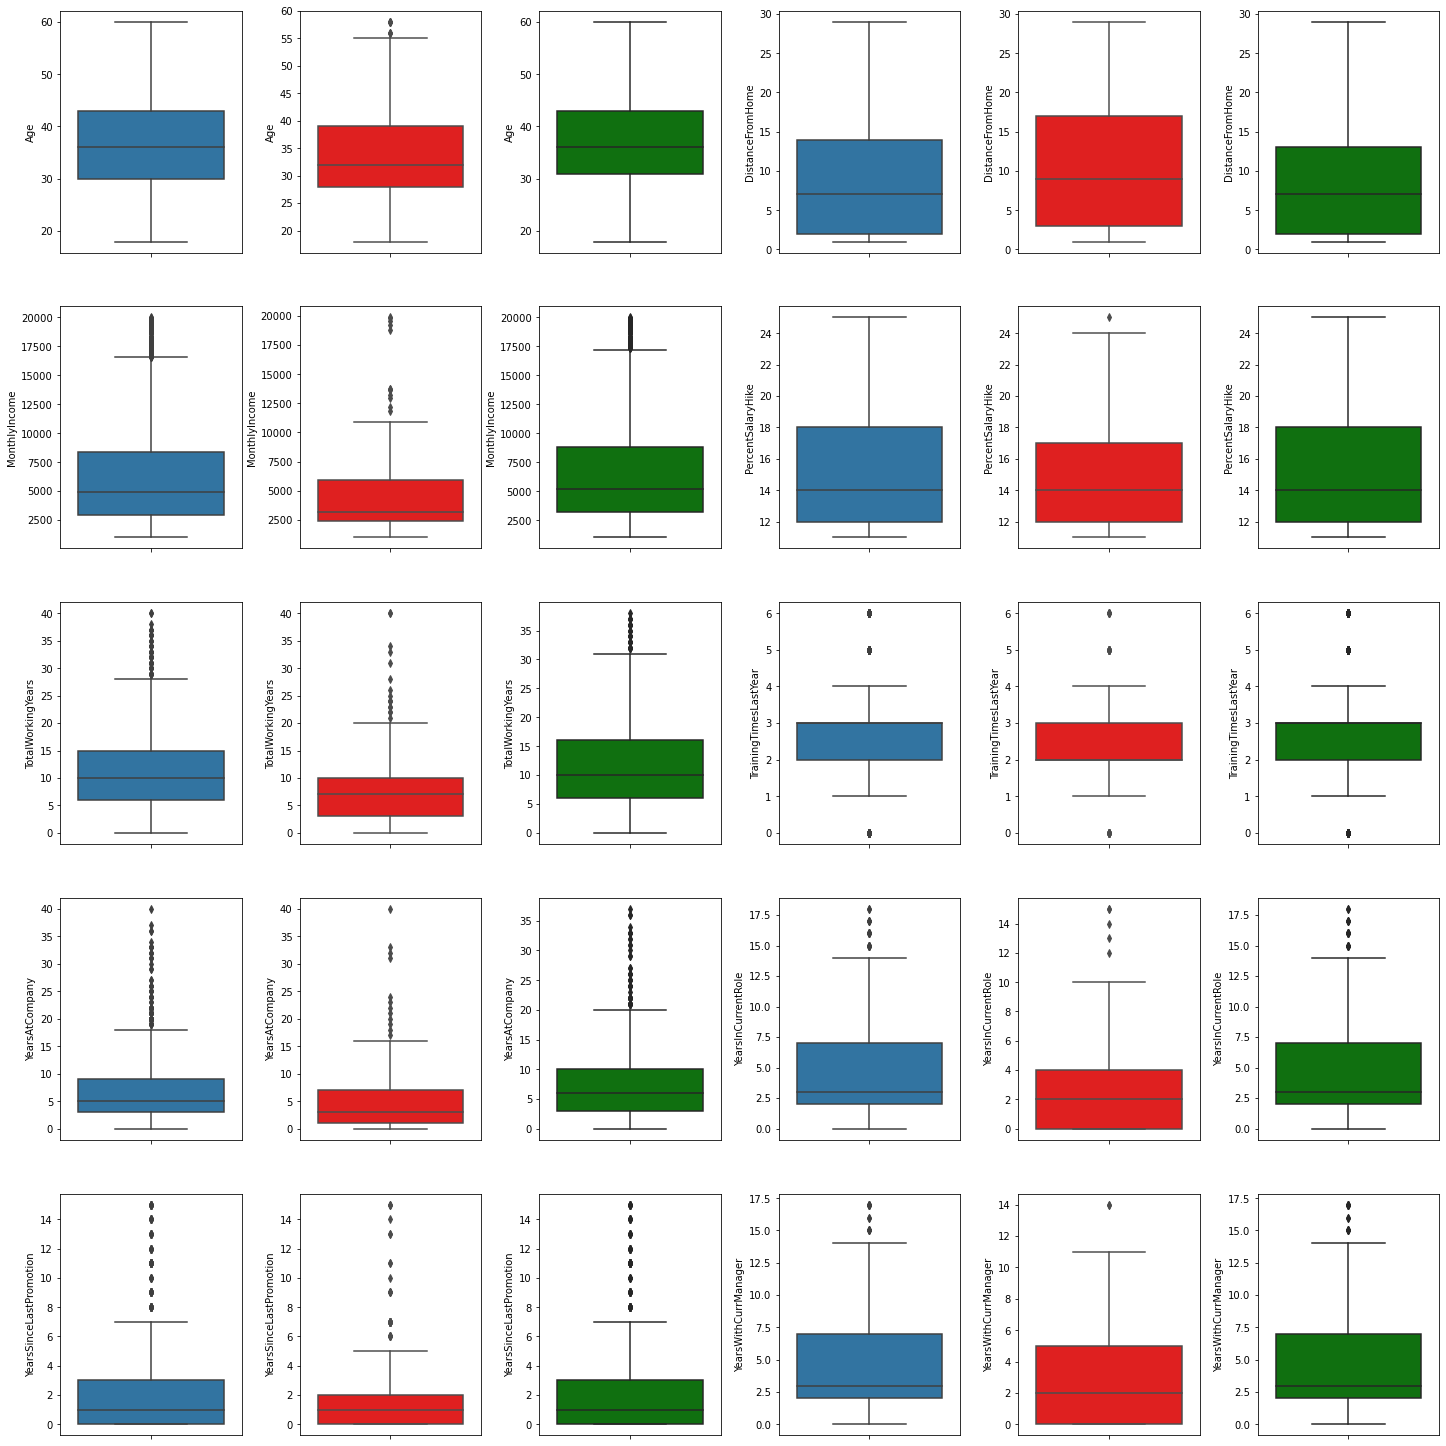

In [33]:
#Boxplot
fig, axs = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k in numeric:
    sns.boxplot(y=k, data=df, ax=axs[index])        
    sns.boxplot(y=k, data=df[df['Attrition']=='Yes'], color='r', ax=axs[index+1])    
    sns.boxplot(y=k, data=df[df['Attrition']=='No'], color='g', ax=axs[index+2])
    index += 3
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

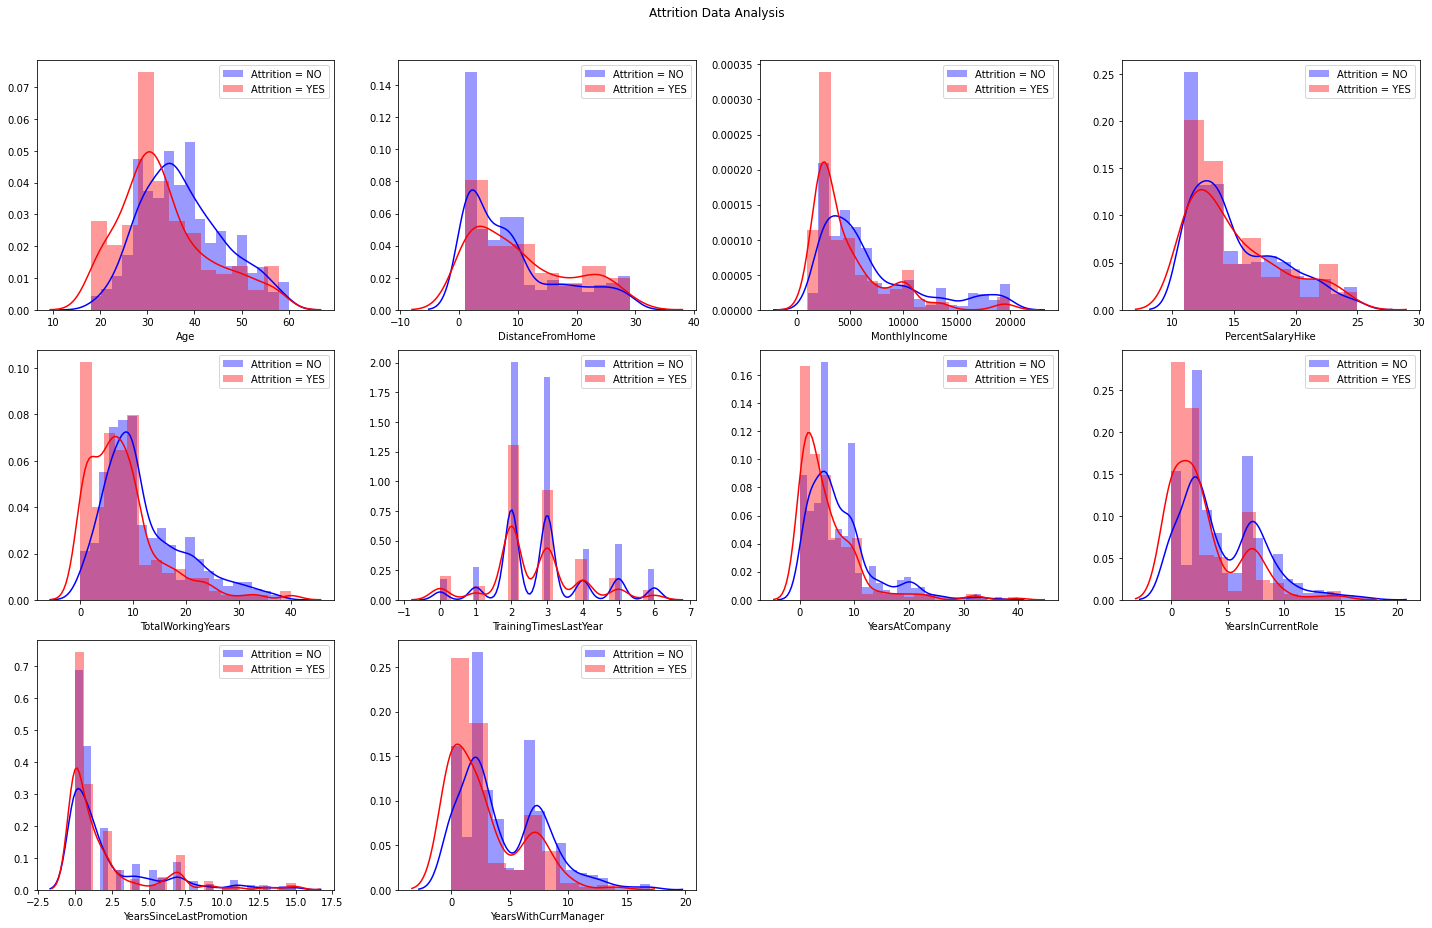

In [34]:
# Distribution plot
fig = plt.figure(figsize = (20, 25))
j = 0
for col in numeric:
    plt.subplot(6, 4, j+1)
    j += 1    
    sns.distplot(df[df["Attrition"] == 'No'][col], color='b',label='Attrition = NO')
    sns.distplot(df[df["Attrition"] == 'Yes'][col], color='r',label='Attrition = YES')
    
    plt.legend(loc='best')
fig.suptitle('Attrition Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

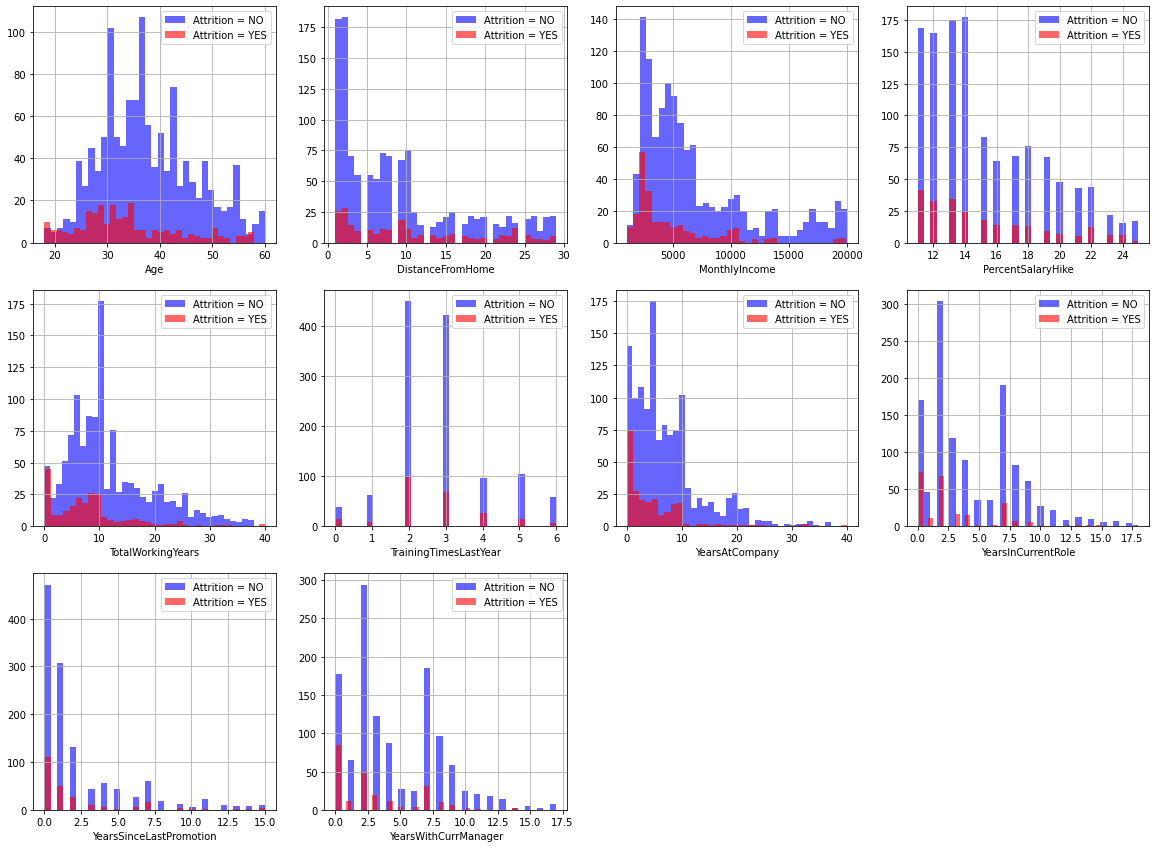

In [35]:
#Histogram plot
plt.figure(figsize=(20, 20))
for i, column in enumerate(numeric, 1):
    plt.subplot(4, 4, i)
    df[df["Attrition"] == 'No'][column].hist(bins=35, color='blue', label='Attrition = NO', alpha=0.6)
    df[df["Attrition"] == 'Yes'][column].hist(bins=35, color='red', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

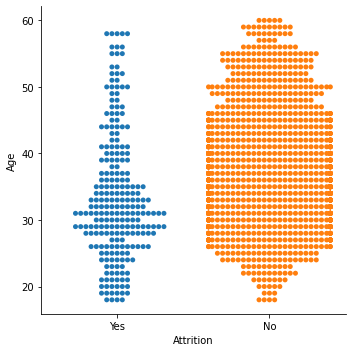

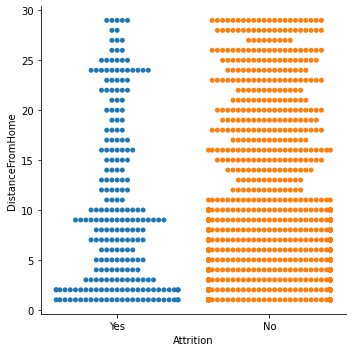

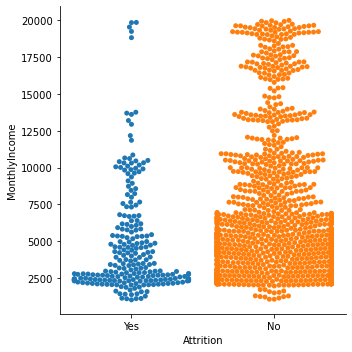

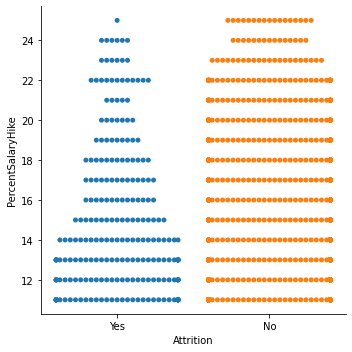

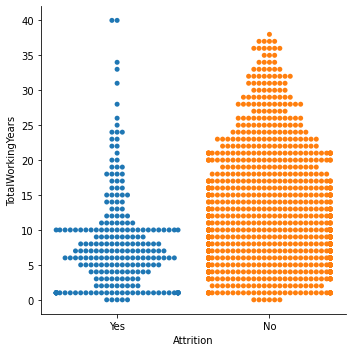

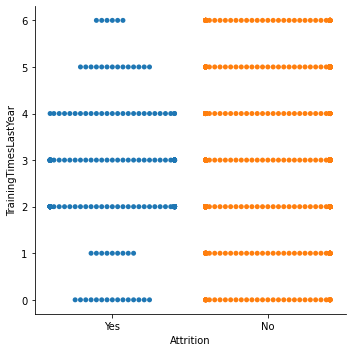

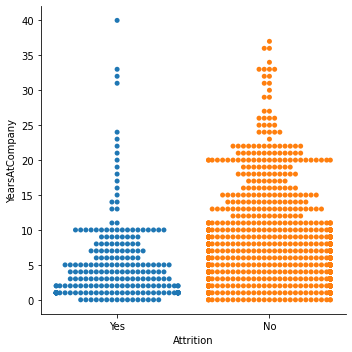

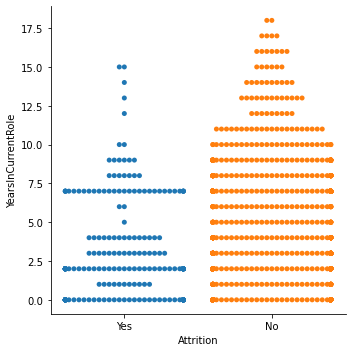

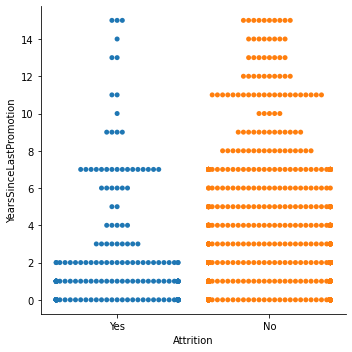

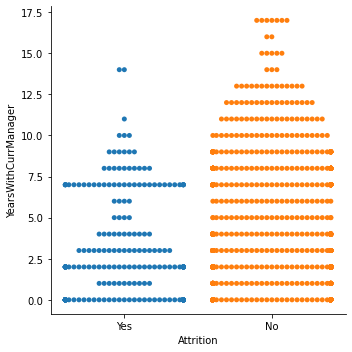

In [36]:
#Cat plot
def CatPlot(df,numeric,cat):
    for k in numeric:
        sns.catplot(x=cat,y=k, kind='swarm', data=df )
        
        
CatPlot(df,numeric,'Attrition')

Employees with Low JobLevel, MonthlyIncome, YearAtCompany, and TotalWorkingYears are more likely to quit there jobs.

BusinessTravel : The workers who travel a lot are more likely to quit then other employees.

Department : The worker in Sales are more likely to quit and Research & Development are more likely to stay.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

# Data processing

In [37]:
#Splitting
from sklearn.model_selection import train_test_split #option 1 splitting
from sklearn.model_selection import cross_val_score

#Encoding
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn import preprocessing 

# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [38]:
df_encoded = df.copy()
#df_encoded = df_encoded.drop(columns=['StandardHours'])

In [39]:
# Encode labels 
le = LabelEncoder()

In [40]:
label = ['Attrition','BusinessTravel','Department', 'EducationField','Gender','JobRole','MaritalStatus','OverTime', 'age_group']

In [41]:
for col in label:
    df_encoded[col]=le.fit_transform(df[col])

In [42]:
x = df_encoded.drop(columns=['Attrition','age_group','Satisfaction']) #remove made up groups
y = df_encoded['Attrition']

In [43]:
#Scale Features
min_max_scaler = preprocessing.MinMaxScaler()
x.loc[:,numeric] = min_max_scaler.fit_transform(x.loc[:,numeric])

In [44]:
x.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,0.547619,0.738095,0.452381,0.357143,0.214286,0.333333,0.976190,0.285714,0.476190,0.428571,...,0.261905,0.761905,0.500000,0.309524,0.190476,0.428571,0.500000,0.214286,0.738095,0.380952
BusinessTravel,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000
Department,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
DistanceFromHome,0.000000,0.250000,0.035714,0.071429,0.035714,0.035714,0.071429,0.821429,0.785714,0.928571,...,0.964286,0.964286,0.821429,0.142857,0.142857,0.785714,0.178571,0.107143,0.035714,0.250000
Education,2.000000,1.000000,2.000000,4.000000,1.000000,2.000000,3.000000,1.000000,3.000000,3.000000,...,4.000000,3.000000,1.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,3.000000
EducationField,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,3.000000,1.000000,1.000000,3.000000,...,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,3.000000,1.000000,3.000000,3.000000
EnvironmentSatisfaction,2.000000,3.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,2.000000,2.000000,4.000000,3.000000,4.000000,2.000000,4.000000,2.000000
Gender,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
JobInvolvement,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000
JobLevel,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,...,1.000000,3.000000,4.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000


In [45]:
# split into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

# Classification model

In [46]:
from sklearn.naive_bayes import GaussianNB
# Statsmodels Logistic Regression
from statsmodels.discrete.discrete_model import Logit
from scipy.special import logit

from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, accuracy_score, confusion_matrix

In [47]:
def loss(name,y_true, y_pred):    
    pre = precision_score(y_true, y_pred) 
    rec = recall_score(y_true, y_pred) 
    f1 = f1_score(y_true, y_pred) 
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    
    print(name)
    print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))
    display(pd.DataFrame(cm))
    print('Incorrect predictions',cm.sum() - cm.diagonal().sum())
    print('Correct predictions',cm.diagonal().sum())
    print('Error',round((cm.sum() - cm.diagonal().sum())/cm.sum(),2))

In [48]:
def Gaussian(x_train,y_train, x_test,y_test):
    clf = GaussianNB()
    clf.fit(x_train, y_train)
    clf_pred = clf.predict(x_test)

    loss('GaussianNB',y_test, clf_pred)
    
Gaussian(x_train,y_train, x_test,y_test)

GaussianNB
  pre: 0.404
  rec: 0.590
  f1: 0.479
  loss: 5.874
  acc: 0.830


,0,1
0,221,34
1,16,23


Incorrect predictions 50
Correct predictions 244
Error 0.17


In [49]:
def StatRegression(x_train,y_train, x_test,y_test):
    m = Logit(y_train, x_train)
    m = m.fit()

    y_predict = m.predict(x_test)
    y_predict = (y_predict > 0.5) * 1 
    loss('Stat Logistic regression',y_test, y_predict)
    display(m.summary())
    return m.pvalues
    
pvalues = StatRegression(x_train,y_train, x_test,y_test)
pvalues

Optimization terminated successfully.
         Current function value: 0.319237
         Iterations 8
Stat Logistic regression
  pre: 0.632
  rec: 0.308
  f1: 0.414
  loss: 3.994
  acc: 0.884


,0,1
0,248,7
1,27,12


Incorrect predictions 34
Correct predictions 260
Error 0.12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1149
Method:                           MLE   Df Model:                           26
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.2957
Time:                        15:59:48   Log-Likelihood:                -375.42
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 1.828e-51
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -1.0750      0.599     -1.795      0.073      -2.249       0.099
BusinessTravel               0.0043      0.148      0.029      0.977      -0.285       0.294
Department                   0.7661      0.282      2.717      0.007       0.213       1.319
DistanceFromHome             1.0207      0.319      3.200      0.001       0.396       1.646
Education                    0.0900      0.090      0.998      0.318      -0.087       0.267
EducationField               0.0797      0.071      1.120      0.263      -0.060       0.219
EnvironmentSatisfaction     -0.3229      0.087     -3.699      0.000      -0.494      -0.152
Gender                       0.4012      0.195      2.053      0.040       0.018       0.784
JobInvolvement              -0.4267      0.128     -3.338      0.001      -0.677      -0.176
JobLevel                    -0.3904      0.315     -1.238      0.216      -1.008       0.228
JobRole                     -0.0557      0.055     -1.018      0.309      -0.163       0.052
JobSatisfaction             -0.3706      0.085     -4.354      0.000      -0.537      -0.204
MaritalStatus                0.6593      0.176      3.744      0.000       0.314       1.004
MonthlyIncome               -0.7634      1.412     -0.541      0.589      -3.531       2.004
NumCompaniesWorked           0.1943      0.040      4.861      0.000       0.116       0.273
OverTime                     1.9374      0.200      9.685      0.000       1.545       2.329
PercentSalaryHike           -0.7353      0.479     -1.536      0.125      -1.674       0.203
PerformanceRating            0.3795      0.252      1.506      0.132      -0.114       0.873
RelationshipSatisfaction    -0.1385      0.087     -1.594      0.111      -0.309       0.032
StockOptionLevel            -0.2135      0.150     -1.420      0.156      -0.508       0.081
TotalWorkingYears           -2.1552      1.231     -1.751      0.080      -4.567       0.257
TrainingTimesLastYear       -0.6990      0.457     -1.531      0.126      -1.594       0.196
WorkLifeBalance             -0.2636      0.129     -2.044      0.041      -0.516      -0.011
YearsAtCompany               5.0369      1.602      3.145      0.002       1.898       8.176
YearsInCurrentRole          -3.4961      0.866     -4.035      0.000      -5.194      -1.798
YearsSinceLastPromotion      2.3015      0.668      3.444      0.001       0.992       3.611
YearsWithCurrManager        -2.2829      0.822     -2.777      0.005      -3.894      -0.672
============================================================================================
"""

Age                         7.268168e-02
BusinessTravel              9.768596e-01
Department                  6.595515e-03
DistanceFromHome            1.374617e-03
Education                   3.182091e-01
EducationField              2.629011e-01
EnvironmentSatisfaction     2.166339e-04
Gender                      4.010926e-02
JobInvolvement              8.439954e-04
JobLevel                    2.156691e-01
JobRole                     3.087569e-01
JobSatisfaction             1.335514e-05
MaritalStatus               1.811168e-04
MonthlyIncome               5.887167e-01
NumCompaniesWorked          1.165975e-06
OverTime                    3.496236e-22
PercentSalaryHike           1.245830e-01
PerformanceRating           1.320221e-01
RelationshipSatisfaction    1.108927e-01
StockOptionLevel            1.557095e-01
TotalWorkingYears           7.992923e-02
TrainingTimesLastYear       1.257510e-01
WorkLifeBalance             4.096575e-02
YearsAtCompany              1.660581e-03
YearsInCurrentRo

In [50]:
m = Logit(y_train, x_train)
m = m.fit()

y_predict = m.predict(x_test)
y_predict = (y_predict > 0.5) * 1 

Optimization terminated successfully.
         Current function value: 0.319237
         Iterations 8


In [51]:
y_predict.sum()

19

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [53]:
rf = RandomForestClassifier(n_estimators=10,max_depth=7, min_samples_leaf=1,n_jobs=-1)

rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
loss('Random Forest',y_test, rf_pred)

Random Forest
  pre: 0.500
  rec: 0.154
  f1: 0.235
  loss: 4.582
  acc: 0.867


,0,1
0,249,6
1,33,6


Incorrect predictions 39
Correct predictions 255
Error 0.13


### Random forest Grid Search 

In [54]:
params = {
    'n_estimators': [10, 30, 100, 300],
    'max_depth': [3, 5, 7],
    'min_samples_leaf':[1,50,100]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=3, scoring='recall', n_jobs=-1)
grid_search.fit(x_train, y_train)
preds = grid_search.predict(x_test)
print("Best params found: {}".format(grid_search.best_params_))
print("RMSE score: {}".format(mean_squared_error(y_test, preds) ** 0.5))

Best params found: {'max_depth': 7, 'min_samples_leaf': 1, 'n_estimators': 10}
RMSE score: 0.35475391489884145


In [55]:
rf = RandomForestClassifier(n_estimators=100,max_depth=7, min_samples_leaf=1,n_jobs=-1)

rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
loss('Random Forest',y_test, rf_pred)

Random Forest
  pre: 0.800
  rec: 0.103
  f1: 0.182
  loss: 4.229
  acc: 0.878


,0,1
0,254,1
1,35,4


Incorrect predictions 36
Correct predictions 258
Error 0.12


**Random Forest classifier does not produce better results. Therefore we will focus on GaussianNB and Logistic regression in our analysis**

# P-Val and correlation analysis

We compare the correlation between features and remove one of two features that have a correlation higher than 0.9<br/>
In section **Explore Data** we calculated correlations: <br/>

Highest correlation<br/>

Column 1 | Column 2 | Correlation 
 --- | --- | --- 
MonthlyIncome | JobLevel | 0.950300
TotalWorkingYears | JobLevel | 0.782208

In addition to that we will remove features with p-val < 0.05 and 0.1 and see if the model will improve


In [56]:
x_fe = x.copy()

In [57]:
columns = (pvalues <0.1)
columns = columns[columns == True]
columns

Age                        True
Department                 True
DistanceFromHome           True
EnvironmentSatisfaction    True
Gender                     True
JobInvolvement             True
JobSatisfaction            True
MaritalStatus              True
NumCompaniesWorked         True
OverTime                   True
TotalWorkingYears          True
WorkLifeBalance            True
YearsAtCompany             True
YearsInCurrentRole         True
YearsSinceLastPromotion    True
YearsWithCurrManager       True
dtype: bool

In [58]:
x_fe = x_fe[columns.index]
x_fe.T

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
Age,0.547619,0.738095,0.452381,0.357143,0.214286,0.333333,0.976190,0.285714,0.476190,0.428571,...,0.261905,0.761905,0.500000,0.309524,0.190476,0.428571,0.500000,0.214286,0.738095,0.380952
Department,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000
DistanceFromHome,0.000000,0.250000,0.035714,0.071429,0.035714,0.035714,0.071429,0.821429,0.785714,0.928571,...,0.964286,0.964286,0.821429,0.142857,0.142857,0.785714,0.178571,0.107143,0.035714,0.250000
EnvironmentSatisfaction,2.000000,3.000000,4.000000,4.000000,1.000000,4.000000,3.000000,4.000000,4.000000,3.000000,...,4.000000,4.000000,2.000000,2.000000,4.000000,3.000000,4.000000,2.000000,4.000000,2.000000
Gender,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
JobInvolvement,3.000000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000
JobSatisfaction,4.000000,2.000000,3.000000,3.000000,2.000000,4.000000,1.000000,3.000000,3.000000,3.000000,...,1.000000,1.000000,4.000000,1.000000,3.000000,4.000000,1.000000,2.000000,2.000000,3.000000
MaritalStatus,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,2.000000,1.000000,...,2.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
NumCompaniesWorked,8.000000,1.000000,6.000000,1.000000,9.000000,0.000000,4.000000,1.000000,0.000000,6.000000,...,1.000000,4.000000,0.000000,0.000000,0.000000,4.000000,4.000000,1.000000,2.000000,2.000000
OverTime,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000


In [59]:
xfe_train,xfe_test,y_train,y_test = train_test_split(x_fe,y,test_size=0.2,random_state = 42)

In [60]:
Gaussian(xfe_train,y_train, xfe_test,y_test)

GaussianNB
  pre: 0.465
  rec: 0.513
  f1: 0.488
  loss: 4.934
  acc: 0.857


,0,1
0,232,23
1,19,20


Incorrect predictions 42
Correct predictions 252
Error 0.14


In [61]:
StatRegression(xfe_train,y_train, xfe_test,y_test)

Optimization terminated successfully.
         Current function value: 0.328010
         Iterations 7
Stat Logistic regression
  pre: 0.722
  rec: 0.333
  f1: 0.456
  loss: 3.642
  acc: 0.895


,0,1
0,250,5
1,26,13


Incorrect predictions 31
Correct predictions 263
Error 0.11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1160
Method:                           MLE   Df Model:                           15
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.2764
Time:                        16:00:02   Log-Likelihood:                -385.74
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 7.213e-54
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                        -1.0250      0.577     -1.776      0.076      -2.156       0.106
Department                  0.4247      0.170      2.499      0.012       0.092       0.758
DistanceFromHome            0.9402      0.310      3.033      0.002       0.333       1.548
EnvironmentSatisfaction    -0.3001      0.082     -3.678      0.000      -0.460      -0.140
Gender                      0.4223      0.188      2.246      0.025       0.054       0.791
JobInvolvement             -0.4015      0.114     -3.530      0.000      -0.624      -0.179
JobSatisfaction            -0.3596      0.079     -4.536      0.000      -0.515      -0.204
MaritalStatus               0.8364      0.133      6.279      0.000       0.575       1.098
NumCompaniesWorked          0.1902      0.039      4.864      0.000       0.114       0.267
OverTime                    1.9006      0.194      9.804      0.000       1.521       2.281
TotalWorkingYears          -3.8660      1.045     -3.700      0.000      -5.914      -1.818
WorkLifeBalance            -0.2747      0.112     -2.450      0.014      -0.494      -0.055
YearsAtCompany              4.1685      1.559      2.674      0.007       1.113       7.224
YearsInCurrentRole         -3.1889      0.841     -3.792      0.000      -4.837      -1.541
YearsSinceLastPromotion     2.1583      0.646      3.341      0.001       0.892       3.425
YearsWithCurrManager       -1.8919      0.808     -2.343      0.019      -3.475      -0.309
===========================================================================================
"""

Age                        7.567511e-02
Department                 1.244761e-02
DistanceFromHome           2.417921e-03
EnvironmentSatisfaction    2.350275e-04
Gender                     2.472175e-02
JobInvolvement             4.150585e-04
JobSatisfaction            5.727802e-06
MaritalStatus              3.406657e-10
NumCompaniesWorked         1.150566e-06
OverTime                   1.085268e-22
TotalWorkingYears          2.160122e-04
WorkLifeBalance            1.426593e-02
YearsAtCompany             7.499926e-03
YearsInCurrentRole         1.494659e-04
YearsSinceLastPromotion    8.356143e-04
YearsWithCurrManager       1.913778e-02
dtype: float64

**Removing p-val > 0.05 or p-val > 0.1 increased accuracy, however, decreased recal, which is not ideal when predicting attrition**

# Features analysis and engineering

### Adding features 

Another set of new features based on observation: <br/>
· Job_Coy = JobLevel / (YearsAtCompany + 1)<br/>
· Edu_Age_TotalWorking = Education / (Age + TotalWorkingYears)<br/>
· CurrMgr_Coy = YearsWithCurrManager / (YearsAtCompany + 1)<br/>
· CurrRole_CurrMgr = YearsInCurrentRole / (YearsWithCurrManager + 1)<br/>
· Satisfqction = (EnvironmentSatisfaction+JobInvolvement+JobSatisfaction+RelationshipSatisfaction)/4 <br/>
Note: add +1 to denominator to avoid division by zero


In [62]:
x_ext = x.copy()
x_ext['Job_Coy'] = x['JobLevel']/(x['YearsAtCompany']+1)
x_ext['Edu_Age_TotalWorking'] = x['Education']/(x['Age']+x['TotalWorkingYears']+1)
x_ext['CurrMgr_Coy'] = x['YearsWithCurrManager'] / (x['YearsAtCompany']+1)
x_ext['CurrRole_CurrMgr'] = x['YearsInCurrentRole']/(x['YearsWithCurrManager']+1)


#satisfaction - average rating of 4 parameters
x_ext['Satisfaction'] = round((df['EnvironmentSatisfaction'] + df['JobInvolvement'] 
                            + df['JobSatisfaction'] + df['RelationshipSatisfaction'])/4)



In [63]:
x_ext = x_ext.drop(columns=['JobLevel','YearsAtCompany','Education','Age','TotalWorkingYears','YearsWithCurrManager',
                            'YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','EnvironmentSatisfaction',
                           'JobInvolvement', 'JobSatisfaction','RelationshipSatisfaction'])

In [64]:
xext_train,xext_test,y_train,y_test = train_test_split(x_ext,y,test_size=0.2,random_state = 42)

In [65]:
Gaussian(xext_train,y_train, xext_test,y_test)

GaussianNB
  pre: 0.419
  rec: 0.462
  f1: 0.439
  loss: 5.404
  acc: 0.844


,0,1
0,230,25
1,21,18


Incorrect predictions 46
Correct predictions 248
Error 0.16


In [66]:
pvalues_ext = StatRegression(xext_train,y_train, xext_test,y_test)

Optimization terminated successfully.
         Current function value: 0.327264
         Iterations 7
Stat Logistic regression
  pre: 0.529
  rec: 0.231
  f1: 0.321
  loss: 4.464
  acc: 0.871


,0,1
0,247,8
1,30,9


Incorrect predictions 38
Correct predictions 256
Error 0.13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1155
Method:                           MLE   Df Model:                           20
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.2780
Time:                        16:00:02   Log-Likelihood:                -384.86
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 4.373e-51
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
BusinessTravel             -0.0820      0.144     -0.571      0.568      -0.364       0.200
Department                  0.8894      0.274      3.249      0.001       0.353       1.426
DistanceFromHome            1.0528      0.316      3.336      0.001       0.434       1.671
EducationField              0.0890      0.070      1.275      0.202      -0.048       0.226
Gender                      0.3852      0.191      2.017      0.044       0.011       0.759
JobRole                    -0.0688      0.053     -1.297      0.195      -0.173       0.035
MaritalStatus               0.6084      0.174      3.506      0.000       0.268       0.948
MonthlyIncome               0.5982      1.152      0.519      0.604      -1.660       2.856
NumCompaniesWorked          0.1381      0.036      3.808      0.000       0.067       0.209
OverTime                    1.8981      0.196      9.660      0.000       1.513       2.283
PercentSalaryHike          -0.5760      0.461     -1.250      0.211      -1.479       0.327
PerformanceRating           0.0776      0.236      0.328      0.743      -0.386       0.541
StockOptionLevel           -0.2860      0.150     -1.902      0.057      -0.581       0.009
TrainingTimesLastYear      -0.6843      0.442     -1.549      0.121      -1.550       0.182
WorkLifeBalance            -0.2476      0.127     -1.946      0.052      -0.497       0.002
YearsSinceLastPromotion     2.6626      0.620      4.295      0.000       1.448       3.878
Job_Coy                    -1.0521      0.310     -3.390      0.001      -1.660      -0.444
Edu_Age_TotalWorking        0.2118      0.134      1.584      0.113      -0.050       0.474
CurrMgr_Coy                -2.7346      0.880     -3.106      0.002      -4.460      -1.009
CurrRole_CurrMgr           -4.1466      1.010     -4.107      0.000      -6.125      -2.168
Satisfaction               -0.7788      0.142     -5.466      0.000      -1.058      -0.500
===========================================================================================
"""

**Feature engineering improves accuracy slightly, however, reduces recal, which is not ideal for attrition prediction** 

# Outliers analysis

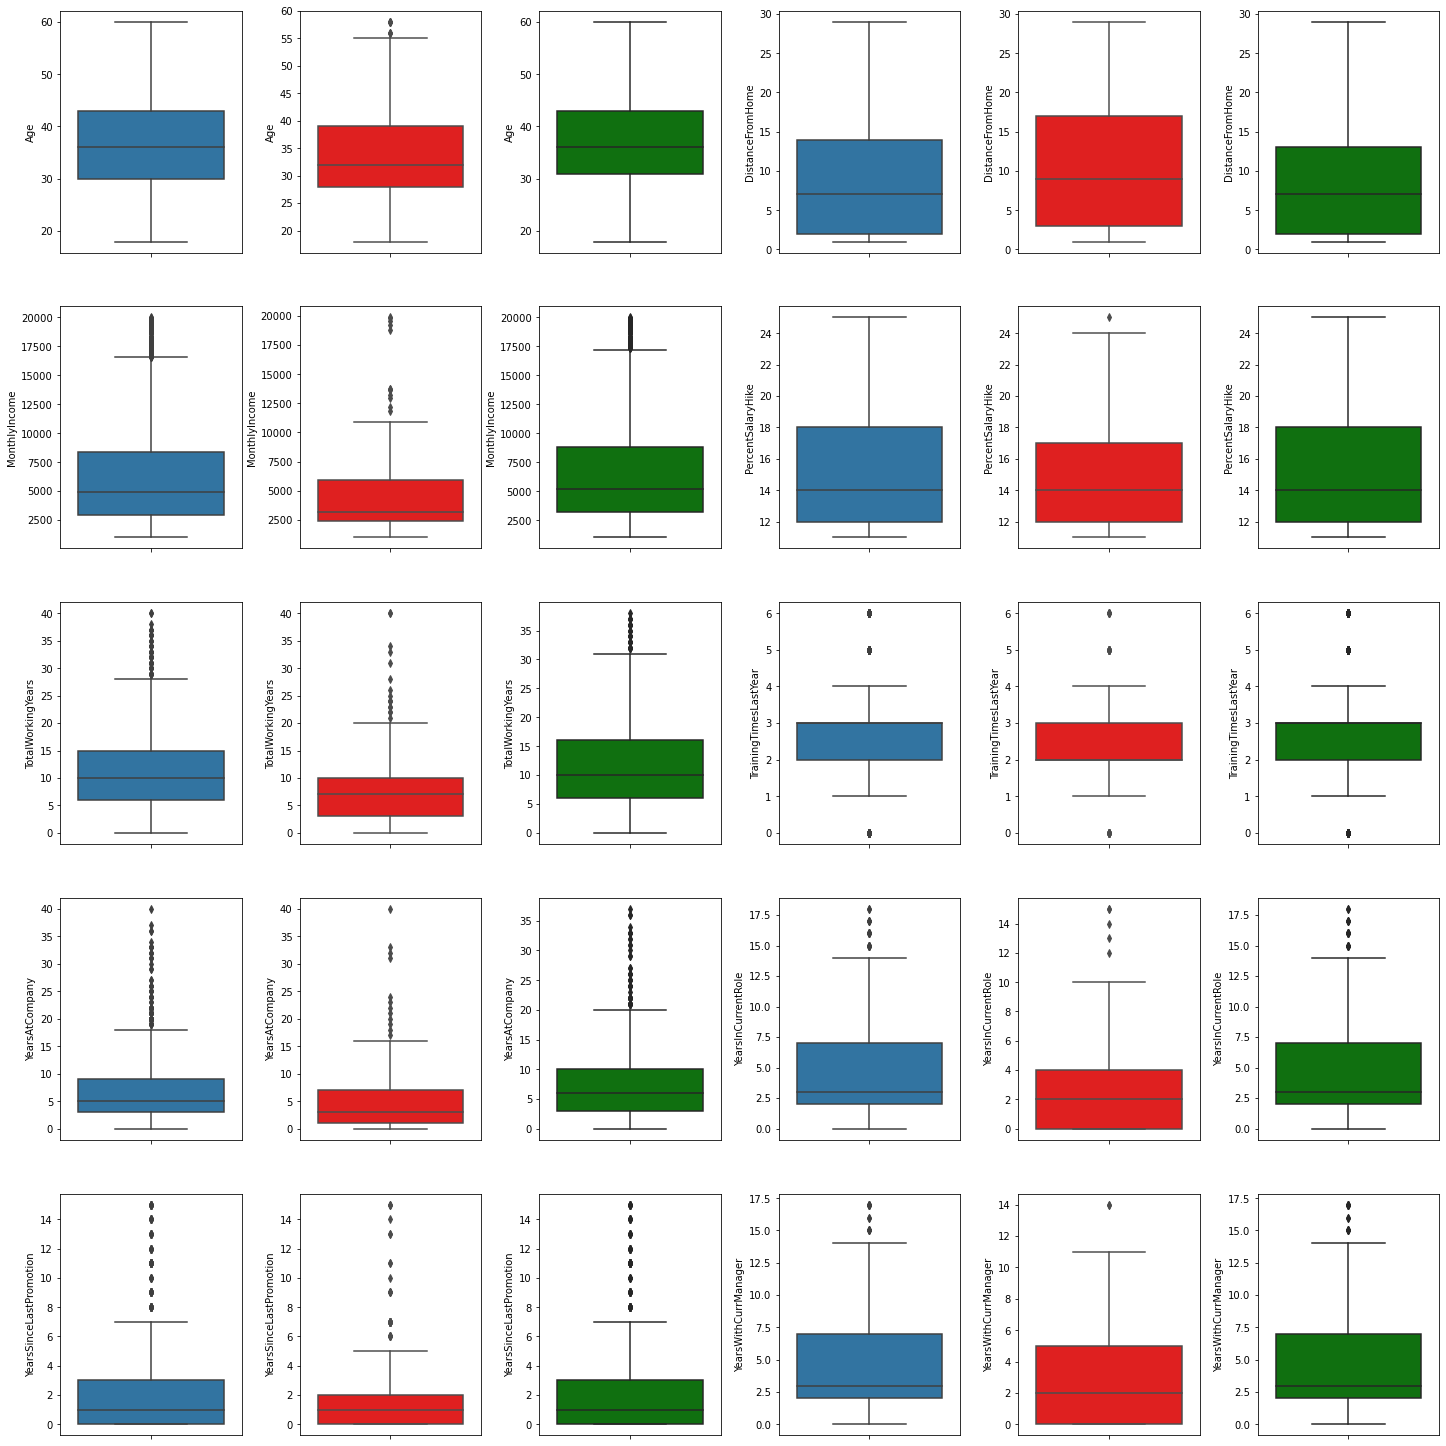

In [67]:
#Boxplot
fig, axs = plt.subplots(ncols=6, nrows=5, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k in numeric:
    sns.boxplot(y=k, data=df, ax=axs[index])        
    sns.boxplot(y=k, data=df[df['Attrition']=='Yes'], color='r', ax=axs[index+1])    
    sns.boxplot(y=k, data=df[df['Attrition']=='No'], color='g', ax=axs[index+2])
    index += 3
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [68]:
for k, v in df[numeric].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("%s outliers = %.2f%%" % (k, perc))

Age outliers = 0.00%
DistanceFromHome outliers = 0.00%
MonthlyIncome outliers = 7.76%
PercentSalaryHike outliers = 0.00%
TotalWorkingYears outliers = 4.29%
TrainingTimesLastYear outliers = 16.19%
YearsAtCompany outliers = 7.96%
YearsInCurrentRole outliers = 1.43%
YearsSinceLastPromotion outliers = 7.28%
YearsWithCurrManager outliers = 0.95%


In [69]:
def EvaluateOuters(df):
    df_outers = pd.DataFrame(columns=['Col','Q25','Q75','iqr','Perc'])
    for name, vals in df.items():
        q25, q75 = np.percentile(vals, 25), np.percentile(vals, 75) # Q25, Q75
        irq = q75 - q25
        
        outers = vals[(vals <= q25 - 1.5 * irq) | (vals >= q75 + 1.5 * irq)]    
        perc = np.shape(outers)[0] * 100.0 / np.shape(df)[0]               
        df_outers = df_outers.append({'Col':name,'Q25':q25,'Q75':q75,'iqr':irq,'Perc':perc},ignore_index = True)
        #print(q25,q75,irq,perc)       
        
    display(round(df_outers,2))
    return round(df_outers,2)

eval_out = EvaluateOuters(x[numeric])

,Col,Q25,Q75,iqr,Perc
0,Age,0.29,0.60,0.31,0.00
1,DistanceFromHome,0.04,0.46,0.43,0.00
2,MonthlyIncome,0.10,0.39,0.29,7.76
3,PercentSalaryHike,0.07,0.50,0.43,0.00
4,TotalWorkingYears,0.15,0.38,0.22,4.29
5,TrainingTimesLastYear,0.33,0.50,0.17,16.19
6,YearsAtCompany,0.08,0.22,0.15,7.96
7,YearsInCurrentRole,0.11,0.39,0.28,1.43
8,YearsSinceLastPromotion,0.00,0.20,0.20,7.28
9,YearsWithCurrManager,0.12,0.41,0.29,0.95


In [70]:
x_out = x.copy()
x_out['Attrition'] = y.values

**Remove outliers for the following categories:** <br/>
#TrainingTimesLastYear, YearsAtCompany, MonthlyIncome

In [71]:
x_out= x_out[(x_out['MonthlyIncome'] >=0.1-0.29) & (x_out['MonthlyIncome'] <=0.39+0.29)]
#x_out= x_out[(x_out['YearsAtCompany'] >=0.08-0.15) & (x_out['YearsAtCompany'] <=0.22+0.15)]
x_out = x_out[(x_out['TrainingTimesLastYear'] >=0.33-0.17) & (x_out['TrainingTimesLastYear'] <=0.5+0.17)]
x_out

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
1,0.738095,1,1,0.250000,1,1,3,1,2,2,...,4,1,0.250,0.500000,3,0.250,0.388889,0.066667,0.411765,0
2,0.452381,2,1,0.035714,2,4,4,1,2,1,...,2,0,0.175,0.500000,3,0.000,0.000000,0.000000,0.000000,1
3,0.357143,1,1,0.071429,4,1,4,0,3,1,...,3,0,0.200,0.500000,3,0.200,0.388889,0.200000,0.000000,0
4,0.214286,2,1,0.035714,1,3,1,1,3,1,...,4,1,0.150,0.500000,3,0.050,0.111111,0.133333,0.117647,0
5,0.333333,1,1,0.035714,2,1,4,1,3,1,...,3,0,0.200,0.333333,2,0.175,0.388889,0.200000,0.352941,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,0.309524,0,1,0.142857,3,3,2,1,3,2,...,2,0,0.250,0.333333,3,0.225,0.222222,0.066667,0.411765,0
1464,0.190476,2,2,0.142857,3,4,4,0,2,1,...,4,0,0.125,0.333333,3,0.100,0.111111,0.000000,0.000000,0
1465,0.428571,1,1,0.785714,2,3,3,1,4,2,...,3,1,0.425,0.500000,3,0.125,0.111111,0.000000,0.176471,0
1468,0.738095,1,2,0.035714,3,3,4,1,2,2,...,4,0,0.425,0.500000,2,0.225,0.333333,0.000000,0.470588,0


In [72]:
y_out = x_out['Attrition']
x_out = x_out.drop(columns=['Attrition'])

In [73]:
#train on set with removed outliers but test on the original test
xout_train, xout_test, yout_train, y_out_test = train_test_split(x_out,y_out,test_size=0.2,random_state = 42)

In [74]:
Gaussian(xout_train,yout_train, x_test,y_test)

GaussianNB
  pre: 0.423
  rec: 0.564
  f1: 0.484
  loss: 5.522
  acc: 0.840


,0,1
0,225,30
1,17,22


Incorrect predictions 47
Correct predictions 247
Error 0.16


In [75]:
pvalues_ext = StatRegression(xout_train,yout_train, x_test,y_test)

Optimization terminated successfully.
         Current function value: 0.323572
         Iterations 7
Stat Logistic regression
  pre: 0.588
  rec: 0.256
  f1: 0.357
  loss: 4.229
  acc: 0.878


,0,1
0,248,7
1,29,10


Incorrect predictions 36
Correct predictions 258
Error 0.12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                  884
Model:                          Logit   Df Residuals:                      857
Method:                           MLE   Df Model:                           26
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.2750
Time:                        16:00:05   Log-Likelihood:                -286.04
converged:                       True   LL-Null:                       -394.52
Covariance Type:            nonrobust   LLR p-value:                 4.805e-32
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.4313      0.641     -0.673      0.501      -1.687       0.824
BusinessTravel               0.1266      0.171      0.739      0.460      -0.209       0.462
Department                   0.4815      0.328      1.469      0.142      -0.161       1.124
DistanceFromHome             1.3358      0.360      3.706      0.000       0.629       2.042
Education                    0.0969      0.108      0.899      0.369      -0.114       0.308
EducationField               0.0373      0.080      0.468      0.640      -0.119       0.193
EnvironmentSatisfaction     -0.4349      0.100     -4.364      0.000      -0.630      -0.240
Gender                       0.6692      0.232      2.883      0.004       0.214       1.124
JobInvolvement              -0.4751      0.150     -3.176      0.001      -0.768      -0.182
JobLevel                     0.1271      0.354      0.359      0.720      -0.567       0.821
JobRole                     -0.0326      0.064     -0.508      0.611      -0.158       0.093
JobSatisfaction             -0.4266      0.097     -4.391      0.000      -0.617      -0.236
MaritalStatus                0.3999      0.201      1.990      0.047       0.006       0.794
MonthlyIncome               -2.2829      1.741     -1.312      0.190      -5.695       1.129
NumCompaniesWorked           0.1965      0.047      4.174      0.000       0.104       0.289
OverTime                     1.8651      0.231      8.059      0.000       1.412       2.319
PercentSalaryHike           -0.7273      0.544     -1.337      0.181      -1.793       0.339
PerformanceRating            0.4578      0.284      1.612      0.107      -0.099       1.014
RelationshipSatisfaction    -0.3018      0.100     -3.023      0.003      -0.497      -0.106
StockOptionLevel            -0.3178      0.170     -1.875      0.061      -0.650       0.014
TotalWorkingYears           -4.4330      1.497     -2.961      0.003      -7.367      -1.499
TrainingTimesLastYear        0.6189      0.853      0.725      0.468      -1.053       2.291
WorkLifeBalance             -0.2759      0.145     -1.904      0.057      -0.560       0.008
YearsAtCompany               3.7802      2.478      1.526      0.127      -1.076       8.637
YearsInCurrentRole          -3.4345      1.092     -3.144      0.002      -5.575      -1.294
YearsSinceLastPromotion      2.4519      0.845      2.903      0.004       0.797       4.107
YearsWithCurrManager        -1.3326      1.222     -1.091      0.275      -3.727       1.062
============================================================================================
"""

**Eliminating outliers from TrainingTimesLastYear, , MonthlyIncome  improves GaussianNB model** <br/>

YearsAtCompany outliers removal does not add values, therefore commented

# Features reduction - income satisfaction

In [76]:
x_eng = x.copy()

In [77]:
income_satisfaction = x['MonthlyIncome'] * df['Satisfaction'] * x['YearsAtCompany'] *x['PerformanceRating']
#multiplier = 4/income_satisfaction.max()
x_eng['income_satisfaction'] = income_satisfaction #round(income_satisfaction*multiplier)

In [78]:
x_eng['income_satisfaction']

0       0.236209
1       0.651027
2       0.000000
3       0.180095
4       0.038847
          ...   
1465    0.123381
1466    0.496635
1467    0.324360
1468    0.467168
1469    0.107267
Name: income_satisfaction, Length: 1470, dtype: float64

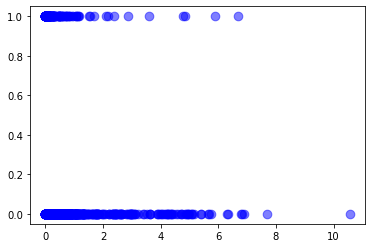

In [79]:
plt.scatter(x_eng['income_satisfaction'], y, s=75, color="b", alpha=0.5)

In [80]:
xeng_train, xeng_test, y_train, y_test = train_test_split( np.asarray(x_eng['income_satisfaction']),y,test_size=0.2,random_state = 42)

In [81]:
Gaussian(xeng_train.reshape(-1, 1),y_train, xeng_test.reshape(-1, 1),y_test)

GaussianNB
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 4.582
  acc: 0.867


,0,1
0,255,0
1,39,0


Incorrect predictions 39
Correct predictions 255
Error 0.13


In [82]:
pvalues_ext = StatRegression(xeng_train,y_train, xeng_test,y_test)

Optimization terminated successfully.
         Current function value: 0.555470
         Iterations 8
Stat Logistic regression
  pre: 0.000
  rec: 0.000
  f1: 0.000
  loss: 4.582
  acc: 0.867


,0,1
0,255,0
1,39,0


Incorrect predictions 39
Correct predictions 255
Error 0.13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1175
Method:                           MLE   Df Model:                            0
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                 -0.2254
Time:                        16:00:05   Log-Likelihood:                -653.23
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.3144      0.203    -11.425      0.000      -2.712      -1.917
==============================================================================
"""

**Introducing income satisfaction measure does not improve model significantly, and also reduces recall. Therefore we dismiss this model**

# Clustering & PCA

In [83]:
x_clust = x
#x_clust['Attrition'] = y
x_clust.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,2,2,0.000000,2,1,2,0,3,2,...,3,1,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118
1,0.738095,1,1,0.250000,1,1,3,1,2,2,...,4,4,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765
2,0.452381,2,1,0.035714,2,4,4,1,2,1,...,3,2,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000
3,0.357143,1,1,0.071429,4,1,4,0,3,1,...,3,3,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000
4,0.214286,2,1,0.035714,1,3,1,1,3,1,...,3,4,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647


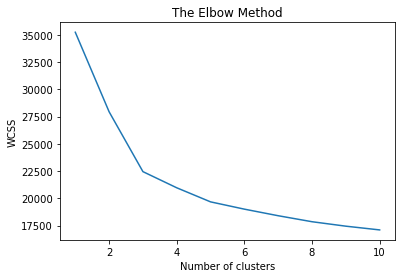

In [84]:
#Elbow analysis
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x_clust)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Number of clusters = 2
Silhouette score = 0.19519276206507613

Number of clusters = 3
Silhouette score = 0.21208612340570077

Number of clusters = 4
Silhouette score = 0.18615922261169845

Number of clusters = 5
Silhouette score = 0.1594129727133868

Number of clusters = 6
Silhouette score = 0.1351696829412285

Number of clusters = 7
Silhouette score = 0.11305402366065932

Number of clusters = 8
Silhouette score = 0.10437023011428402

Number of clusters = 9
Silhouette score = 0.0997129072717352

Optimal number of clusters = 3


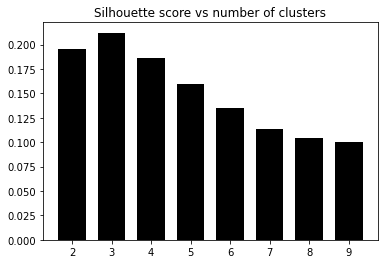

In [85]:
#Silhouette analysis 
from sklearn import metrics

# Initialize variables
scores = []
values = np.arange(2, 10)

# Iterate through the defined range
for num_clusters in values:
    # Train the KMeans clustering model
    kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)
    kmeans.fit(x_clust)
    score = metrics.silhouette_score(x_clust, kmeans.labels_, 
                metric='euclidean', sample_size=len(x_clust))

    print("\nNumber of clusters =", num_clusters)
    print("Silhouette score =", score)
                    
    scores.append(score)
    
# Plot silhouette scores
plt.figure()
plt.bar(values, scores, width=0.7, color='black', align='center')
plt.title('Silhouette score vs number of clusters')

# Extract best score and optimal number of clusters
num_clusters = np.argmax(scores) + values[0]
print('\nOptimal number of clusters =', num_clusters)

plt.show()

In [86]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_clust)
y_kmeans

array([0, 2, 0, ..., 1, 2, 1])

In [87]:
x_clust['clust'] = y_kmeans
x_clust.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,clust
0,0.547619,2,2,0.000000,2,1,2,0,3,2,...,1,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118,0
1,0.738095,1,1,0.250000,1,1,3,1,2,2,...,4,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765,2
2,0.452381,2,1,0.035714,2,4,4,1,2,1,...,2,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000,0
3,0.357143,1,1,0.071429,4,1,4,0,3,1,...,3,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000,2
4,0.214286,2,1,0.035714,1,3,1,1,3,1,...,4,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647,0


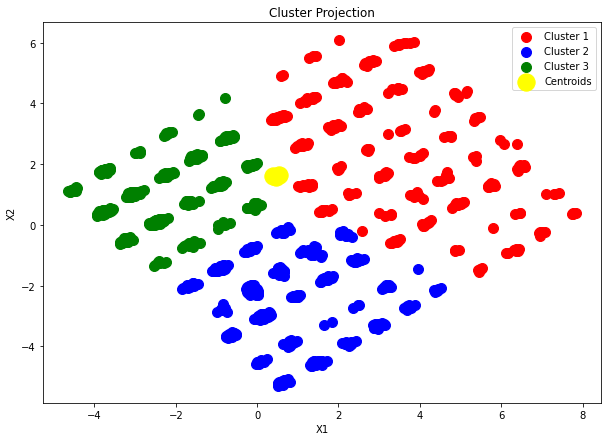

In [93]:
# Visualising the clusters

# Applying PCA to make 2 dimentions 
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_rd = pca.fit_transform(x)

plt.figure(figsize=(10,7))
plt.scatter(x_rd[y_kmeans == 0, 0], x_rd[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_rd[y_kmeans == 1, 0], x_rd[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_rd[y_kmeans == 2, 0], x_rd[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')


plt.title('Cluster Projection')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [94]:
xclust_train, xclust_test, yclust_train, yclust_test = train_test_split(x_clust,y,test_size=0.2,random_state = 42)

In [95]:
Gaussian(xclust_train,yclust_train, xclust_test,yclust_test)

GaussianNB
  pre: 0.367
  rec: 0.564
  f1: 0.444
  loss: 6.461
  acc: 0.813


,0,1
0,217,38
1,17,22


Incorrect predictions 55
Correct predictions 239
Error 0.19


In [96]:
pvalues_ext = StatRegression(xclust_train,yclust_train, xclust_test,yclust_test)

Optimization terminated successfully.
         Current function value: 0.317922
         Iterations 8
Stat Logistic regression
  pre: 0.684
  rec: 0.333
  f1: 0.448
  loss: 3.759
  acc: 0.891


,0,1
0,249,6
1,26,13


Incorrect predictions 32
Correct predictions 262
Error 0.11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1148
Method:                           MLE   Df Model:                           27
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                  0.2986
Time:                        16:03:17   Log-Likelihood:                -373.88
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                 1.551e-51
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -1.0030      0.604     -1.662      0.097      -2.186       0.180
BusinessTravel               0.0062      0.148      0.042      0.966      -0.284       0.297
Department                   0.7570      0.283      2.674      0.007       0.202       1.312
DistanceFromHome             1.0548      0.320      3.297      0.001       0.428       1.682
Education                    0.0919      0.090      1.018      0.309      -0.085       0.269
EducationField               0.0789      0.071      1.106      0.269      -0.061       0.219
EnvironmentSatisfaction     -0.3186      0.088     -3.635      0.000      -0.490      -0.147
Gender                       0.3999      0.196      2.041      0.041       0.016       0.784
JobInvolvement              -0.4052      0.128     -3.154      0.002      -0.657      -0.153
JobLevel                    -0.3953      0.314     -1.258      0.208      -1.011       0.221
JobRole                      0.0007      0.064      0.010      0.992      -0.124       0.125
JobSatisfaction             -0.3633      0.086     -4.247      0.000      -0.531      -0.196
MaritalStatus                0.6751      0.177      3.815      0.000       0.328       1.022
MonthlyIncome               -0.8248      1.411     -0.585      0.559      -3.590       1.940
NumCompaniesWorked           0.0962      0.069      1.400      0.162      -0.038       0.231
OverTime                     1.9580      0.201      9.735      0.000       1.564       2.352
PercentSalaryHike           -0.8621      0.486     -1.773      0.076      -1.815       0.091
PerformanceRating            0.4936      0.261      1.892      0.058      -0.018       1.005
RelationshipSatisfaction    -0.1451      0.087     -1.665      0.096      -0.316       0.026
StockOptionLevel            -0.2046      0.151     -1.359      0.174      -0.500       0.090
TotalWorkingYears           -1.8477      1.234     -1.497      0.134      -4.267       0.572
TrainingTimesLastYear       -0.6755      0.459     -1.472      0.141      -1.575       0.224
WorkLifeBalance             -0.2559      0.130     -1.975      0.048      -0.510      -0.002
YearsAtCompany               4.6561      1.601      2.908      0.004       1.518       7.794
YearsInCurrentRole          -3.3807      0.868     -3.895      0.000      -5.082      -1.679
YearsSinceLastPromotion      2.3078      0.669      3.451      0.001       0.997       3.618
YearsWithCurrManager        -2.3100      0.824     -2.803      0.005      -3.925      -0.695
clust                       -0.4111      0.234     -1.757      0.079      -0.870       0.047
============================================================================================
"""

**Clustering does not yield model improvement**

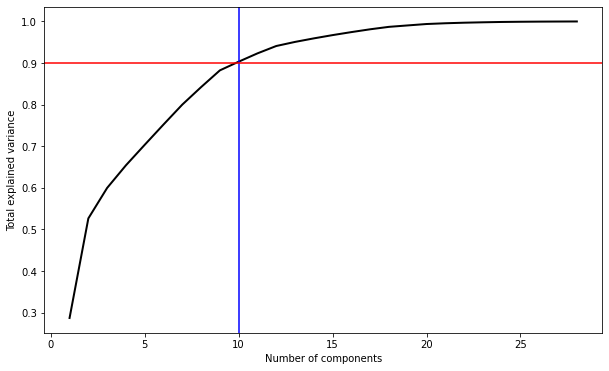

52.65 perceint of variance explained by 2 components 


In [97]:
# Exploring PCA dimentions
from sklearn.decomposition import PCA
pca=PCA()
#x_clust = df_encoded.values
pca.fit(x_clust) 
data_pca= pca.transform(x_clust)
data_pca.shape
pca.components_ #show components
#find cumsum
cumsum=np.cumsum(pca.explained_variance_ratio_)
#plot
plt.figure(figsize=(10,6))
plt.plot(range(1,cumsum.shape[0]+1), cumsum, color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.axvline(10, c='b')
plt.axhline(0.8996 , c='r')
plt.show()
#caclulate
explained_variance = pca.explained_variance_ratio_
print("%0.2f perceint of variance explained by 2 components " %  ((explained_variance[0]+explained_variance[1])*100))

In [98]:
var_exp = 0
for num in range(0,10):
    var_exp += explained_variance[num]
    
print("%0.2f perceint of variance explained by 10 components " %  (var_exp*100))

90.33 perceint of variance explained by 10 components 


In [99]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
x_top10 = pca.fit_transform(x)

In [100]:
# split into train and test 
xpca_train,xpca_test,ypca_train,ypca_test = train_test_split(x_top10,y,test_size=0.2,random_state = 42)

In [101]:
Gaussian(xpca_train,ypca_train, xpca_test,ypca_test)

GaussianNB
  pre: 0.600
  rec: 0.077
  f1: 0.136
  loss: 4.464
  acc: 0.871


,0,1
0,253,2
1,36,3


Incorrect predictions 38
Correct predictions 256
Error 0.13


In [102]:
pvalues_ext = StatRegression(xpca_train,ypca_train, xpca_test,ypca_test)

Optimization terminated successfully.
         Current function value: 0.664341
         Iterations 4
Stat Logistic regression
  pre: 0.167
  rec: 0.667
  f1: 0.267
  loss: 16.800
  acc: 0.514


,0,1
0,125,130
1,13,26


Incorrect predictions 143
Correct predictions 151
Error 0.49


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1176
Model:                          Logit   Df Residuals:                     1166
Method:                           MLE   Df Model:                            9
Date:                Mon, 21 Dec 2020   Pseudo R-squ.:                 -0.4656
Time:                        16:03:17   Log-Likelihood:                -781.26
converged:                       True   LL-Null:                       -533.07
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0087      0.023      0.383      0.702      -0.036       0.053
x2             0.0710      0.025      2.868      0.004       0.022       0.120
x3             0.0808      0.045      1.789      0.074      -0.008       0.169
x4            -0.2354      0.053     -4.443      0.000      -0.339      -0.132
x5             0.1352      0.055      2.462      0.014       0.028       0.243
x6             0.1090      0.056      1.948      0.051      -0.001       0.219
x7            -0.0946      0.055     -1.720      0.085      -0.202       0.013
x8            -0.2762      0.059     -4.663      0.000      -0.392      -0.160
x9             0.0416      0.060      0.697      0.486      -0.075       0.158
x10            0.1678      0.085      1.978      0.048       0.002       0.334
==============================================================================
"""

**After applying PCA Accuracy has increased, however, recall did not improve. Therefore, it is not the best approach to build a model**

### Conclusion:

Descriptive analysis demonstrated that generally, younger employees who earn less money and have less experience in their careers were more likely to leave their positions, broadly confirming the human resources literature on factors contributing to attrition. Generally, this sort of attrition is to be expected, and not necessarily negative. It appears there may be some relationship between providing training and opportunities for promotion and attrition; firms wishing to reduce attrition may explore such options. 